# Manuscript figures

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import biotite.structure.io.pdb as pdb
import biotite.structure as struc
import numpy as np
import sys
sys.path.append("../bin")
from sequence import get_sequence
from sequence import find_sortase
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches 
import matplotlib.gridspec as gridspec
import warnings
from Bio import BiopythonParserWarning
warnings.simplefilter('ignore', BiopythonParserWarning)
pd.set_option('display.max_columns', None)


In [3]:
from dotenv import load_dotenv
load_dotenv("../.env")

TABLE = os.getenv("TABLE")
LOG_REG_MODEL = os.getenv("LOG_REG_MODEL")
AFDB_JESS_SCAN_TABLE = os.getenv("AFDB_JESS_SCAN_TABLE")
AFDB_HMM_SCAN_TABLE = os.getenv("AFDB_HMM_SCAN_TABLE")
PDB_DATA_TABLE = os.getenv("PDB_BIOCHEM")
AF_DATA_TABLE = os.getenv("AF2_TEMPLATES_BIOCHEM")
POSITIVE_CONTROL_IDENTITIES = os.getenv("POSITIVE_CONTROL_IDENTITIES")
POSITIVE_CONTROL = os.getenv("POSITIVE_CONTROL")
AFDB_DOMAINS = os.getenv("AFDB_DOMAINS")
HMM_DOMAINS = os.getenv("HMM_DOMAINS")
ADH_TABLE = os.getenv("ADH_TABLE")
STALK_TABLE = os.getenv("STALK_TABLE")
AFDB_SCAN_SEQUENCES = os.getenv("AFDB_SCAN_SEQUENCES")
ARCHAEA_RANDOM_SEQUENCES = os.getenv("ARCHAEA_RANDOM_SEQUENCES")
BACTERIA_RANDOM_SEQUENCES = os.getenv("BACTERIA_RANDOM_SEQUENCES")

In [4]:
FIGURES = "../figures"
INPUT_FIGURES = "../data/input_figures"

# Info table
df = pd.read_csv(TABLE)
df["Deposition date"] = pd.to_datetime(df["Deposition date"])
# If any bond has been fixed, change its status
df.loc[df["Fixed"] == True, "Assigned bond"] = False
# Assign path
df["path"] = df.apply(lambda x: os.path.join(POSITIVE_CONTROL, f"{x['PDB code']}_{x['Chain']}.pdb"), axis=1)
df["id"] = df.apply(lambda x: f"{x['PDB code']}_{x['Chain']}_"+
                    "_".join( 
                        [str(i) for i in sorted(
                            [
                            x["Position 1\r\n(Bond 1)"],
                            x["Position 2\r\n(catalytic)"],
                            x["Position 3\r\n(Bond 2)"]
                            ]
                            )]
                            ), axis=1)
# Identity data
identity_df = pd.read_csv(POSITIVE_CONTROL_IDENTITIES)
# Make it reciprocal
identity_df = pd.concat([identity_df, identity_df.rename(columns={"Query":"Target", "Target":"Query"})])

# Biophysical data table
dt_df = pd.read_csv(PDB_DATA_TABLE)
dt_df["mean_rASA"] = dt_df["rASA"].apply(lambda x: np.mean(eval(x)))
af_df = pd.read_csv(AF_DATA_TABLE)

# Get isopep sequence ()
dt_df["isopep_sequence"] = dt_df.apply(get_sequence, pdb=True, axis=1)
af_df["isopep_sequence"] = af_df.apply(get_sequence, pdb=False, axis=1)

# Add cis
dt_df["cis"] = False
dt_df.loc[(dt_df["pseudo_omega"]>=-60)&(dt_df["pseudo_omega"]<60), "cis"] = True

stalk_df = pd.read_csv(STALK_TABLE).rename(columns={"Pfam ID": "pfamA_acc"})
adh_df = pd.read_csv(ADH_TABLE).rename(columns={"Pfam ID": "pfamA_acc"})

/nfs/research/agb/research/francesco/anaconda3/envs/isopeptide/lib/python3.12/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.4.1.post1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
random_seqs_df = pd.concat([pd.read_csv(ARCHAEA_RANDOM_SEQUENCES), 
                pd.read_csv(BACTERIA_RANDOM_SEQUENCES)])
random_seqs_df["kingdom"] = random_seqs_df["taxonomy"].apply(lambda x: x.split(";")[0].replace(".", ""))

In [8]:
# Get template-based AFDB scans

str_df = pd.read_csv(AFDB_JESS_SCAN_TABLE, low_memory=False)

In [9]:
# Whole set of domains from template-based methods

strd_df = pd.read_csv(AFDB_DOMAINS)

In [10]:
seq_df = pd.read_csv(AFDB_SCAN_SEQUENCES)
# Add missing info
seq_df = pd.merge(seq_df, str_df[["uniprot_acc", "kingdom"]])
seq_df["len"] = seq_df["sequence"].apply(len) 

In [11]:
non_isopep = [
    "Helicase_C_2",
    'DUF7617',
    'Cu-oxidase_2',
    'DeoC',
    'Ion_trans',
    'AsmA',
    'Radical_SAM',
    'CarboxypepD_reg',
    'Ribonuc_L-PSP',
    'Phosphorylase',
    'Ufd2P_core',
    'DUF2334',
    'HEM4',
    'Transpeptidase',
    'Arginosuc_syn_C',
    'Arabinose_Iso_C',
    'Glyco_hydro_79n',
    'Peptidase_C13',
    'Phage_portal_2',
    'MbnP',
    'AsnA',
    'GH113',
    'TruD',
    'GCE_fung',
    'ATG22',
    'DrsE_2',
    'Glyco_hydro_38C',
    'Glyco_hydro_3',
    'ELFV_dehydrog',
    'MFS_1',
    'MFS_2',
    'Lip_A_acyltrans',
    'HTH_24',
    'N6_Mtase',
    'NB-ARC',
    'NUDIX',
    'NUP214',
    'DUF4203',
    'DUF5723',
    'Memo',
    'MucBP',
    'Nrap_D2',
    'NYN',
    'PBP_dimer_2',
    'Omp85',
    'PI3_PI4_kinase',
    'Cu-oxidase_4',
    'DDE_Tnp_1',
    'DUF1397',
    'Ribosomal_S3Ae',
    'RnaseA',
    'SBP_bac_1',
    'SBP_bac_8',
    'SRR1',
    'Usher',
    'WD40',
    'YycH'
]

isopep = [
    'SdrD_B',
    'SpaA',
    'DUF11',
    'Cna_B',
    'DUF7507',
    'Collagen_bind',
    'FctA',
    'GramPos_pilinBB',
    'DUF5979',
    'GramPos_pilinD1',
    'DUF7619',
    'AgI_II_C2',
    'SpaA_4',
    'Helicase_C_2',
    'DUF7933',
    'Antigen_C',
    'SpaA_2',
    'GBS104-like_Ig',
    'DUF7927',
    'SpaA_3',
    'Sgo0707_N2',
    'DUF7926',
    'GramPos_pilinD3',
    'DUF7617',
    'DUF7929',
    'DUF7925',
    'DUF7601', 'CARDB' # These ones not present in the paper (to Few hits)
]
prev_known_isopep = [ 'AgI_II_C2',      'Sgo0707_N2', 'GramPos_pilinBB',
         'Collagen_bind',       'Antigen_C',  'GBS104-like_Ig',
               'DUF5979',            'SpaA', 'GramPos_pilinD3',
                  'FctA', 'GramPos_pilinD1',           'Cna_B']

In [12]:
# Find sortase motifs
ib_proteins = str_df[(str_df["probability"]>.65)&(str_df["kingdom"]=="Bacteria")&(~str_df["pfamA_id"].isin(non_isopep))]["uniprot_acc"].unique()
sub_df = seq_df[(seq_df["uniprot_acc"].isin(ib_proteins))].copy()
sub_df["Sortase motif"] = sub_df["sequence"].apply(find_sortase)

# Add to domains database
strd_df = pd.concat([strd_df, sub_df[(sub_df["Sortase motif"])][["uniprot_acc"]]\
        .assign(pfamA_id="Sortase motif")\
        .assign(pfamA_acc="PFXXXXX")[["uniprot_acc", "pfamA_acc", "pfamA_id"]]])

In [13]:
# plot params
mpl.rcParams['font.size'] = 15
mpl.rcParams['font.weight'] = 'normal'
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.labelweight'] = 'normal'
mpl.rcParams['axes.titlesize'] = 25
mpl.rcParams['axes.titleweight'] = 'normal'
# size of letters that specify images
ANNOT_FONT_SIZE = 50

## Figure 2

In [37]:
import matplotlib.patches as mpatches

/tmp/ipykernel_4030040/2890872349.py:43: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  lightgreen_patch = mpatches.Patch(color='lightgreen', alpha=0.3, edgecolor="black", linestyle="--", label="Aromatic cap")
/tmp/ipykernel_4030040/2890872349.py:44: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  ax.legend(handles=ax.get_legend().legendHandles + [lightgreen_patch], loc="lower right")


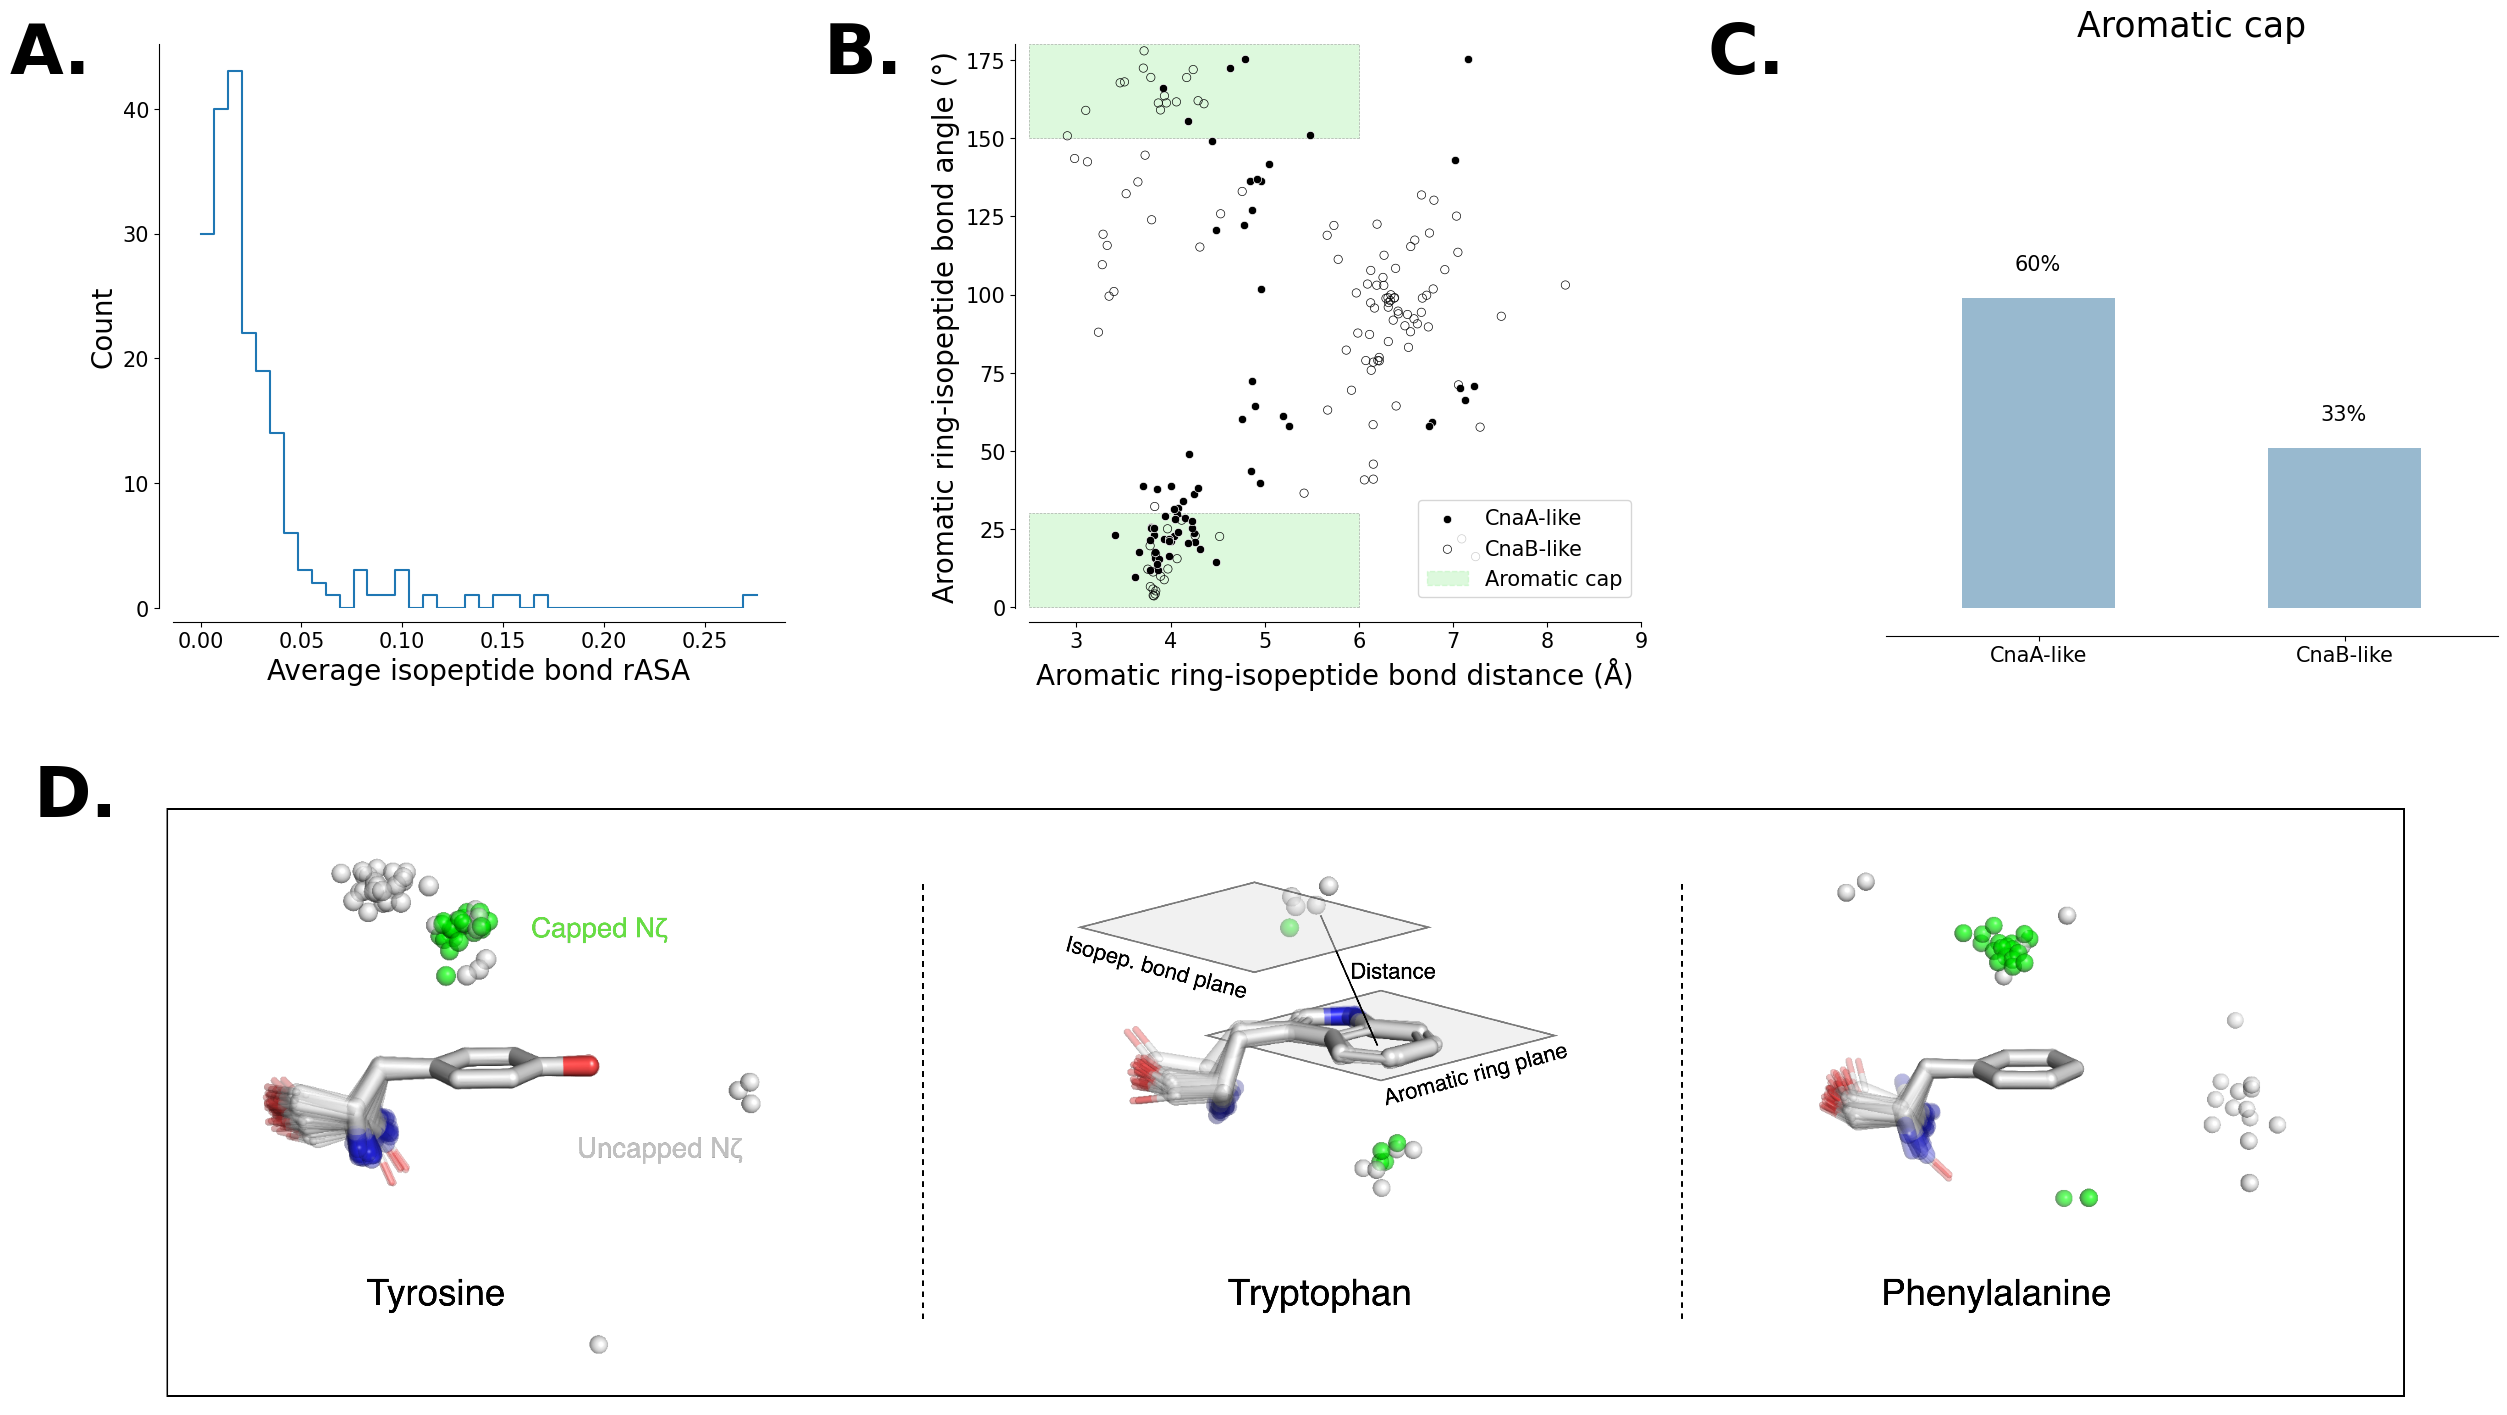

In [43]:
fig = plt.figure(figsize=[30, 15])
gs = gridspec.GridSpec(nrows=2, ncols=3, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0:3])

# 1
ax=ax1
sns.histplot(dt_df, x="mean_rASA", ax=ax, element="step", fill=False)
ax.set_ylabel("Count")
ax.set_xlabel("Average isopeptide bond rASA")
sns.despine(ax=ax, offset=10)

# 2
ax=ax2
plot_df = dt_df[dt_df["Isopeptide type"]!="Mutant"] \
                .rename(columns={"aro_cap":"Aromatic cap"})
sns.scatterplot(plot_df[plot_df["Isopeptide type"]=="CnaA-like"], 
                y="aro-isopep_planes_angle", 
                x="distance_to_aro", ax=ax,
                edgecolors="white", facecolors='black',
               label="CnaA-like")

sns.scatterplot(plot_df[plot_df["Isopeptide type"]=="CnaB-like"], 
                y="aro-isopep_planes_angle", 
                x="distance_to_aro", ax=ax,
                edgecolors="black", facecolors='none',
               label="CnaB-like")

ax.set_ylim([-0.2, 180])
ax.set_xlim([2.5, 9])
ax.set_ylabel("Aromatic ring-isopeptide bond angle (°)")
ax.set_xlabel("Aromatic ring-isopeptide bond distance (Å)")
sns.despine(ax=ax, offset=10)

# Area of aro cap
ax.fill_betweenx([0, 30], 2.5, 6, color='lightgreen', alpha=0.3, zorder=0, lw=0.5, edgecolor="black", ls="--")
ax.fill_betweenx([150, 180], 2.5, 6, color='lightgreen', alpha=0.3, zorder=0, lw=0.5, edgecolor="black", ls="--")

# Add gree square to legend
lightgreen_patch = mpatches.Patch(color='lightgreen', alpha=0.3, edgecolor="black", linestyle="--", label="Aromatic cap")
ax.legend(handles=ax.get_legend().legendHandles + [lightgreen_patch], loc="lower right")

# 3
ax=ax3
plot_df = dt_df.drop_duplicates("isopep_sequence").rename(columns={"aro_cap": "Aromatic cap"}).copy()
cond1 = (plot_df["Is bonded"] == True)
cond2 = (plot_df["Interchain"] == False)
cond3 = (plot_df["Bad rotamer"] == False)
cond4 = (plot_df["Isopeptide type"]!="Mutant")
cond5 = (~plot_df["Unusual geometry/chemistry"])

plot_df = plot_df[cond1&cond2&cond3&cond4&cond5].groupby(["Isopeptide type"])\
    .value_counts(["Aromatic cap"], normalize=True).reset_index()
plot_df["Percent"] = plot_df["proportion"].mul(100)

plot_df_2 = plot_df[plot_df["Aromatic cap"]==True].pivot(columns="Aromatic cap", values="Percent", index="Isopeptide type")\
    .reindex(columns=[True], level="first")
sns.barplot(data=plot_df_2, y=True, x="Isopeptide type", ax=ax, hue="Isopeptide type",
            legend=False, palette=["C0", "C0"], alpha=.5, width=.5)

# Annot
y = plot_df[(plot_df["Aromatic cap"]==True)&(plot_df["Isopeptide type"]=="CnaA-like")]["Percent"].iloc[0] + 5
ax.text(x=0-.08, y=y, s=f"{round(y)}%")
y = plot_df[(plot_df["Aromatic cap"]==True)&(plot_df["Isopeptide type"]=="CnaB-like")]["Percent"].iloc[0] + 5
ax.text(x=1-.08, y=y, s=f"{round(y)}%")

ax.set_ylim([0,100])
ax.set_title("Aromatic cap")
ax.set_xlabel("")
ax.set_ylabel("")
plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
sns.despine(ax=ax, offset=20, left=True)
ax.set_yticks([],[])

# 4
ax = ax4
ax.axis("off")
arr_img = plt.imread(os.path.join(INPUT_FIGURES, "fig2_2.png"))
# Rotate
#arr_img = ndimage.rotate(arr_img, -3.8)
im = OffsetImage(arr_img, zoom=.33)
ab = AnnotationBbox(im, xy=(0, 0), xybox=(-.057, -.35), box_alignment=(0, 0), bboxprops=dict(color="white"))
ax.add_artist(ab)

###
plt.subplots_adjust(hspace=0.05, wspace=.4)
plt.text(-.07, 2, "A.", fontsize=ANNOT_FONT_SIZE, weight="bold")
plt.text(.28, 2, "B.", fontsize=ANNOT_FONT_SIZE, weight="bold")
plt.text(.66, 2, "C.", fontsize=ANNOT_FONT_SIZE, weight="bold")
plt.text(-0.06, .68, "D.", fontsize=ANNOT_FONT_SIZE, weight="bold")

plt.savefig(os.path.join(FIGURES, "f2.png"), dpi=300, bbox_inches="tight", pad_inches=0, transparent=True)

/tmp/ipykernel_4030040/2667068554.py:28: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  lightgreen_patch = mpatches.Patch(color='lightgreen', alpha=0.3, edgecolor="black", linestyle="--", label="Aromatic cap")
/tmp/ipykernel_4030040/2667068554.py:29: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  ax.legend(handles=ax.get_legend().legendHandles + [lightgreen_patch])


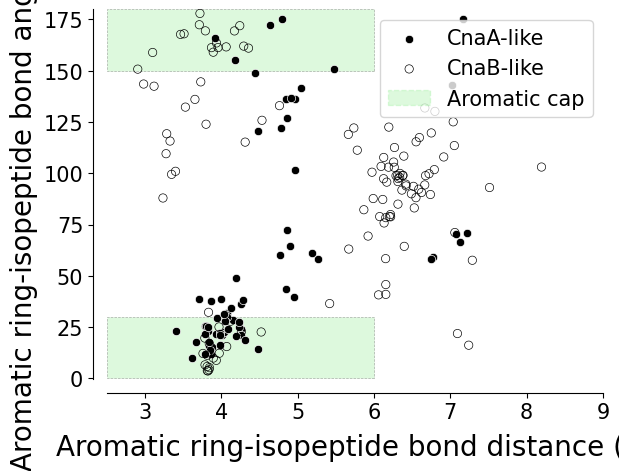

In [36]:
fig, ax = plt.subplots()

plot_df = dt_df[dt_df["Isopeptide type"]!="Mutant"] \
                .rename(columns={"aro_cap":"Aromatic cap"})
sns.scatterplot(plot_df[plot_df["Isopeptide type"]=="CnaA-like"], 
                y="aro-isopep_planes_angle", 
                x="distance_to_aro", ax=ax,
                edgecolors="white", facecolors='black',
               label="CnaA-like")

sns.scatterplot(plot_df[plot_df["Isopeptide type"]=="CnaB-like"], 
                y="aro-isopep_planes_angle", 
                x="distance_to_aro", ax=ax,
                edgecolors="black", facecolors='none',
               label="CnaB-like")

ax.set_ylim([-0.2, 180])
ax.set_xlim([2.5, 9])
ax.set_ylabel("Aromatic ring-isopeptide bond angle (°)")
ax.set_xlabel("Aromatic ring-isopeptide bond distance (Å)")
sns.despine(ax=ax, offset=10)

ax.fill_betweenx([0, 30], 2.5, 6, color='lightgreen', alpha=0.3, zorder=0, lw=0.5, edgecolor="black", ls="--")
ax.fill_betweenx([150, 180], 2.5, 6, color='lightgreen', alpha=0.3, zorder=0, lw=0.5, edgecolor="black", ls="--")

import matplotlib.patches as mpatches

lightgreen_patch = mpatches.Patch(color='lightgreen', alpha=0.3, edgecolor="black", linestyle="--", label="Aromatic cap")
ax.legend(handles=ax.get_legend().legendHandles + [lightgreen_patch])



## Figure 3

In [14]:
from pandas.api.types import CategoricalDtype


In [15]:
round((len(str_df[(str_df["probability"]>.65)&(~str_df["taxonomy"].isna())] \
                .fillna("ND").query('pfamA_id=="ND"')) / len(str_df[(str_df["probability"]>.65)&(~str_df["taxonomy"].isna())] \
                .fillna("ND")))*100, 2)

24.73

/tmp/ipykernel_5404/682428819.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([10**eval(i.get_text()) for i in ax.get_yticklabels()])


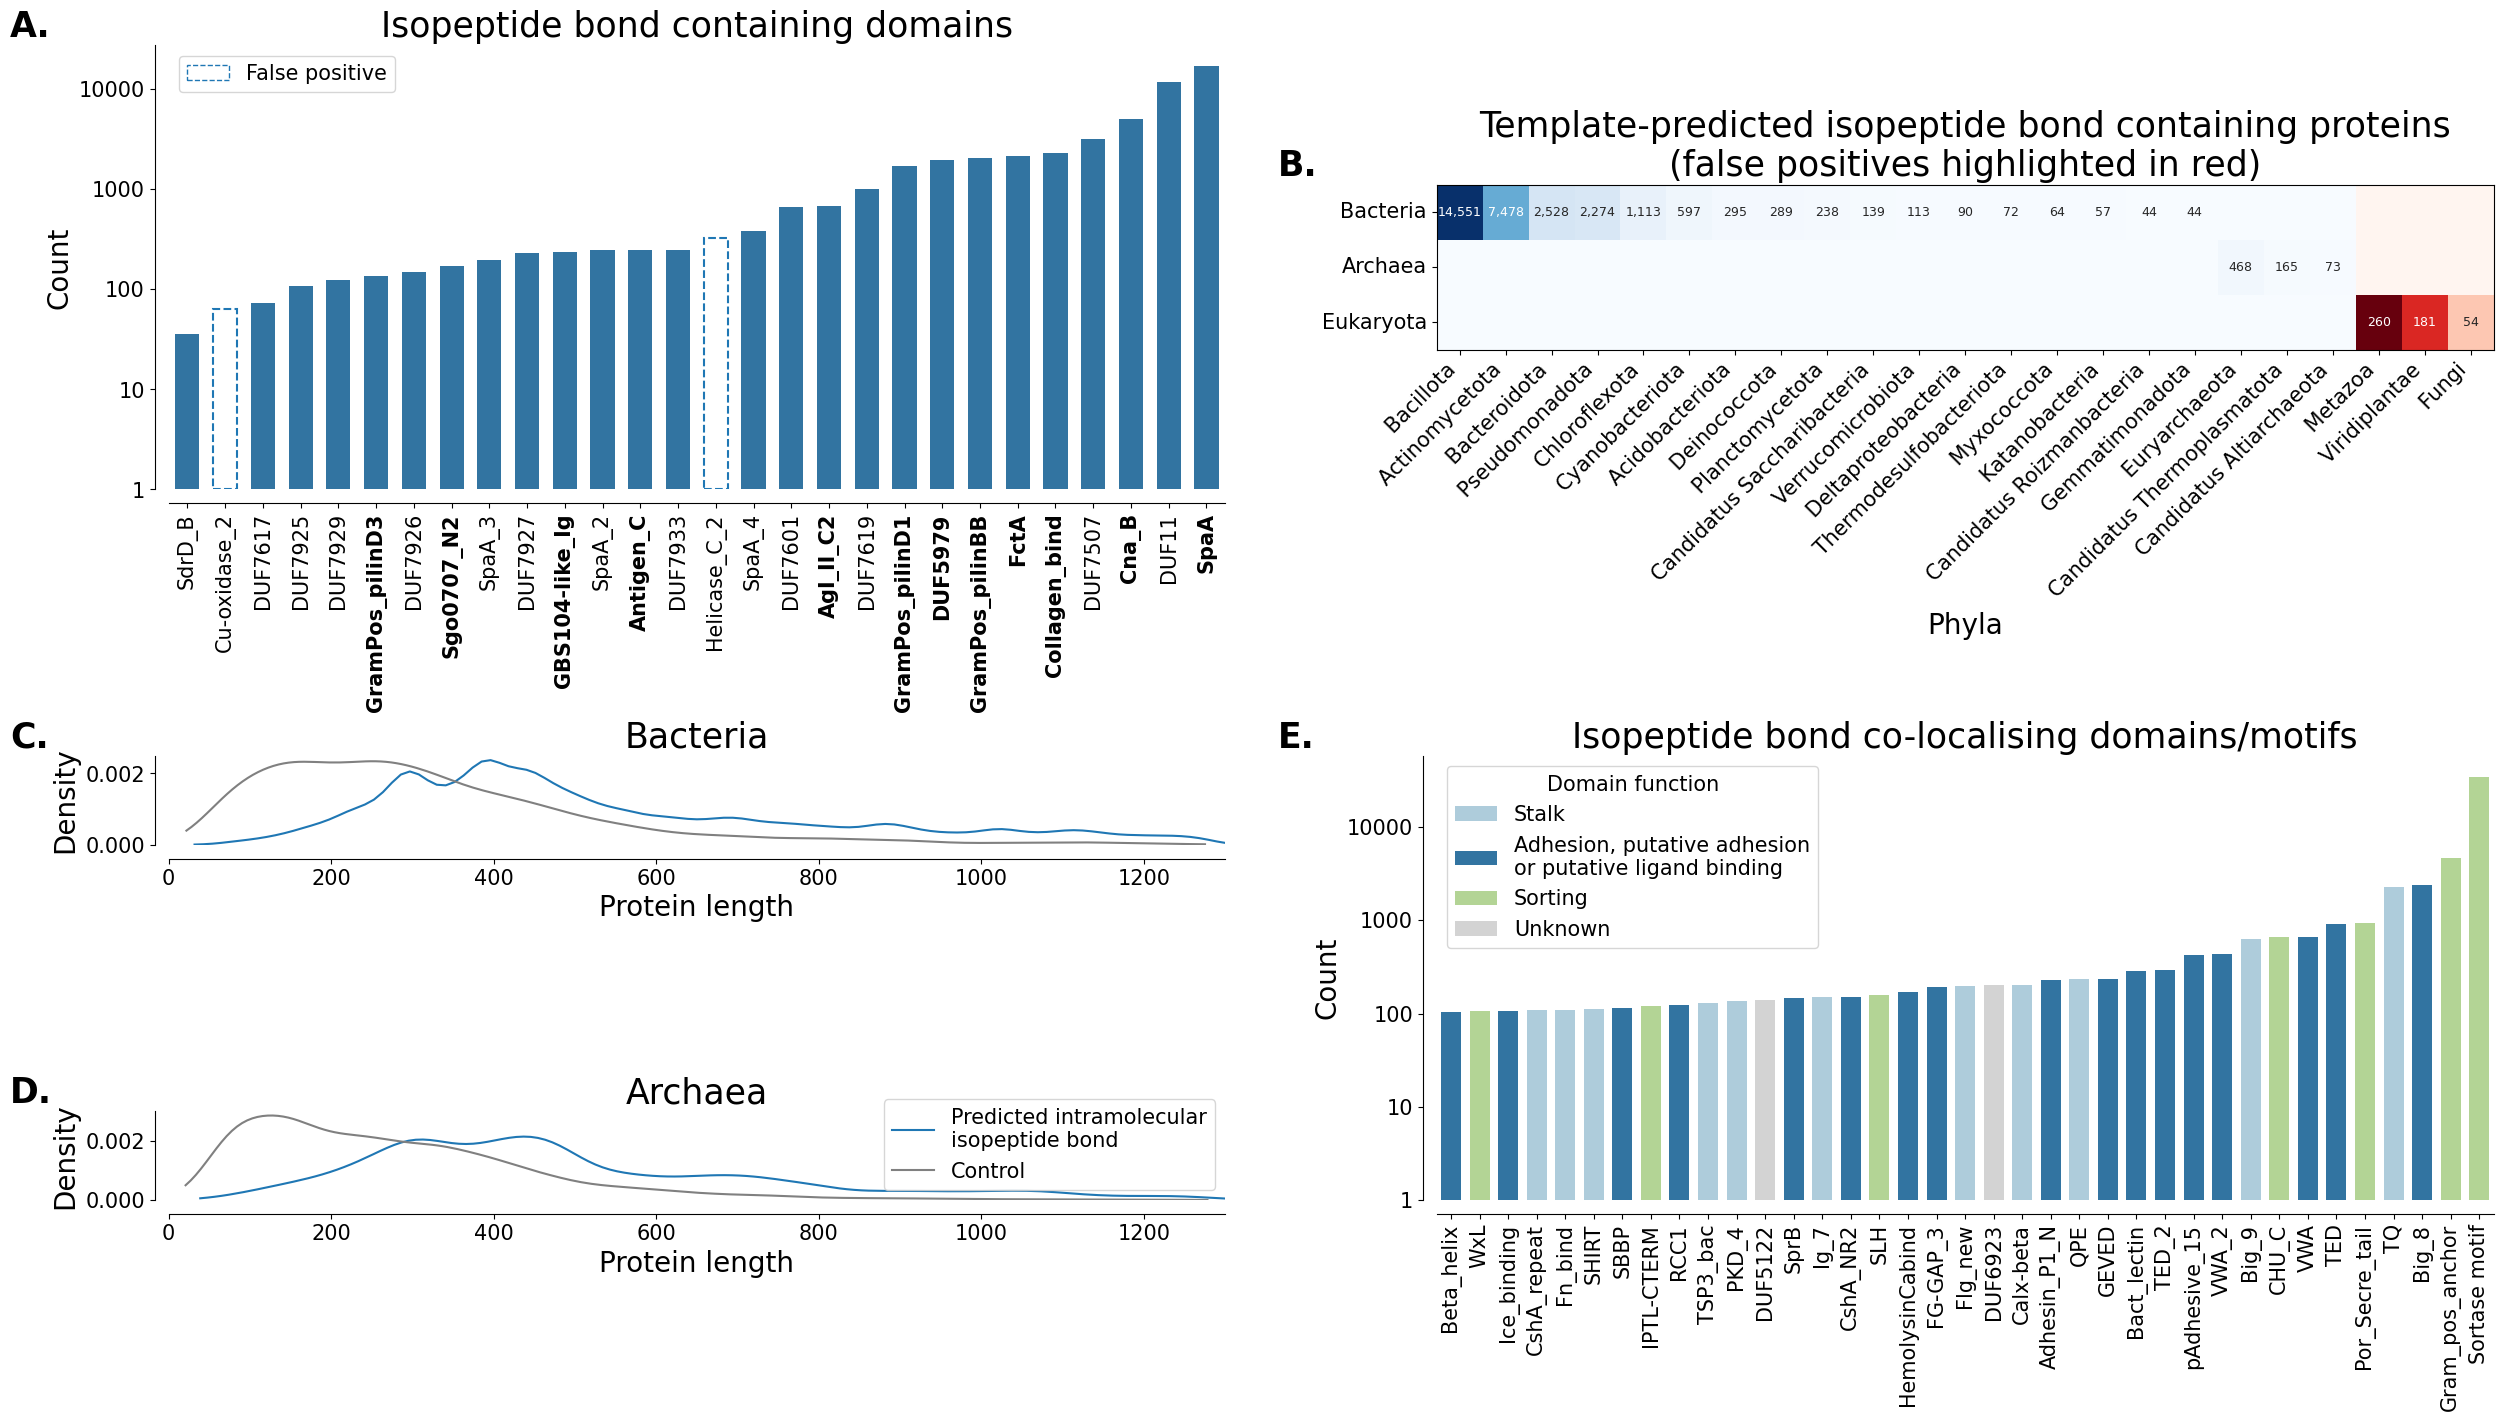

In [19]:
fig = plt.figure(figsize=[30, 15])
gs = gridspec.GridSpec(nrows=4, ncols=2, figure=fig)

ax1 = fig.add_subplot(gs[0:2, 0:1])
ax2 = fig.add_subplot(gs[0:2, 1:2])
ax3 = fig.add_subplot(gs[2:3, 0:1])
ax4 = fig.add_subplot(gs[3:4, 0:1])
ax5 = fig.add_subplot(gs[2:4, 1:2])

#1
ax = ax1

plot_df = str_df[(str_df["probability"]>.65)&(~str_df["taxonomy"].isna())] \
                .value_counts(["pfamA_id"]).reset_index()\
                .query('count>=20')
plot_df["Pfam domain id"] = plot_df["pfamA_id"] #.replace({"DUF11":"CLIPPER", "DUF7507":"CLIPPER_2"})
plot_df["Log count"] = plot_df["count"].apply(np.log10)


# Order
order = plot_df.groupby("Pfam domain id").sum("count").reset_index().sort_values("count")["Pfam domain id"]
cat_dtype = CategoricalDtype(
            categories=order, ordered=True)
plot_df["Pfam domain id"] = plot_df["Pfam domain id"].astype(cat_dtype)

# Reduce alpha of non IBDs
g=sns.barplot(data=plot_df, x="Pfam domain id", y="Log count",
            color="C0",
            dodge=True,
            ax=ax, legend=False, gap=.2, ls="-", lw=1.5)


fills = [False if domain in non_isopep else True for domain in \
         plot_df.sort_values(["Pfam domain id"])["Pfam domain id"]]

for bar, fill in zip(ax.containers[0], fills):
    if not fill:
        bar.set_linestyle("--")
        bar.set_color("C0")
        bar.set_fill(fill)

#template_patch = mpatches.Patch(color='C0', label='Template')
false_positive_patch = mpatches.Patch(facecolor='none', edgecolor='C0', linestyle='--', label='False positive')
ax.legend(handles=[false_positive_patch])

ax.tick_params(axis='x', rotation=90)
sns.despine(ax=ax, offset=10)
ax.set_ylabel("Count")
ax.set_xlabel("")
ax.set_title("Isopeptide bond containing domains")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Re-transform log count
ax.set_yticks([0, 1, 2, 3, 4], [0, 1, 2, 3, 4])
ax.set_yticklabels([10**eval(i.get_text()) for i in ax.get_yticklabels()])

# Set bold for known domains:
for t in ax.get_xticklabels():
    if t.get_text() in prev_known_isopep:
        t.set_fontweight("bold")

# 2
ax = ax2
# Exclude non isopep
plot_df = str_df[(str_df["probability"]>.65)&(~str_df["taxonomy"].isna())].drop_duplicates("uniprot_acc").copy()
plot_df["phyla"] = plot_df["taxonomy"].apply(lambda x: x.split(";")[1].replace(".", "") if len(x.split(";")) >= 2 else np.NaN)
plot_df = plot_df.value_counts(["kingdom", "phyla"]).reset_index()\
                 .query('count>=40&kingdom!="unclassified sequences"&phyla!=" environmental samples"')\
                 .pivot(index="phyla", columns="kingdom", values="count").fillna(0).astype(int)\
                 [["Bacteria", "Archaea", "Eukaryota"]]\
                 .sort_values(["Bacteria", "Archaea", "Eukaryota"], ascending=[False, False, False]).T

false_positive_ids = [" Metazoa", " Viridiplantae", " Fungi"]

# Create masks for false positives and non-false positives (columns-based)
false_positive_mask = plot_df.columns.isin(false_positive_ids)

# Separate data into two layers: false positives and non-false positives
false_positives_layer = plot_df.astype(float).copy()
false_positives_layer.loc[:, ~false_positive_mask] = np.nan  # Keep only false positives

non_false_positives_layer = plot_df.astype(float).copy()
non_false_positives_layer.loc[:, false_positive_mask] = np.nan  # Exclude false positives

# Create colormaps with custom "under" or "over" values
cmap_false_positives = plt.get_cmap("Reds").copy()
cmap_false_positives.set_under("none")  # Make non-values invisible

cmap_non_false_positives = plt.get_cmap("Blues").copy()
cmap_non_false_positives.set_under("none")  # Make non-values invisible

sns.heatmap(non_false_positives_layer, cmap=cmap_non_false_positives, 
            ax=ax, annot=True, annot_kws={'fontsize': 9}, fmt=",.0f", cbar=False)

g=sns.heatmap(false_positives_layer, cmap=cmap_false_positives, 
            ax=ax, annot=True, annot_kws={'fontsize': 9}, fmt=",.0f", cbar=False)

g.set_yticklabels(g.get_yticklabels(), rotation=0)
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')
ax.set_aspect(1.2)
#ax.set_position(pos=[0.375,.54,.5,.5])
ax.set_title("Template-predicted isopeptide bond containing proteins\n(false positives highlighted in red)", pad=25)
ax.set_ylabel("")
ax.set_xlabel("Phyla")

# Add countour lines
for _, spine in ax.spines.items():
    spine.set_visible(True)
# Mask 0s
for text in ax.texts:
    if text.get_text() == '0':
        text.set_visible(False)

# 3,4
for ax, kingdom in zip([ax3, ax4], ["Bacteria", "Archaea"]):
    sns.kdeplot(seq_df[seq_df["kingdom"]==kingdom], x="len", label="Predicted intramolecular\nisopeptide bond", ax=ax, cut=0, color="C0")
    sns.kdeplot(random_seqs_df[random_seqs_df["kingdom"]==kingdom], x="length", label="Control", ax=ax, cut=0, color="gray")
    ax.set_title(kingdom)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    sns.despine(ax=ax, offset=10)
    ax.set_xlabel("Protein length")
    ax.set_xlim([0,1300])
ax.legend()

# 5
ax = ax5

# All domains from IB-containing proteins, excluding IB-containing domains
# Exclude domains associated with known false positives (non_isopep)
# Include domains associated with unknonwn isopep domains
ib_proteins = str_df[(str_df["probability"]>.65)&(str_df["kingdom"].isin(["Bacteria", "Archaea"]))&(~str_df["pfamA_id"].isin(non_isopep))]["uniprot_acc"].unique()
ib_domains = str_df[(str_df["probability"]>.65)&(str_df["kingdom"].isin(["Bacteria", "Archaea"]))&(~str_df["pfamA_id"].isin(non_isopep))]["pfamA_acc"].unique()
d_df_domains = strd_df[(strd_df["uniprot_acc"].isin(ib_proteins))&(~strd_df["pfamA_acc"].isin(ib_domains))]["pfamA_acc"].unique()
count_df = strd_df[(strd_df["uniprot_acc"].isin(ib_proteins))&(~strd_df["pfamA_acc"].isin(ib_domains))].value_counts(["pfamA_acc", "pfamA_id"]).reset_index()

adhesin = adh_df["pfamA_acc"].unique()
stalk = stalk_df["pfamA_acc"].unique()
sorting = ["Por_Secre_tail", "CHU_C", "Sortase motif", "Gram_pos_anchor",
            "SLH", "IPTL-CTERM", "WxL"]
putative_adhesin = ["Big_8", "VWA_2", "FG-GAP_3", "HemolysinCabind", "SprB",
                   "RCC1", "Beta_helix", "RCC1_2", "SBBP", "LTD", "NosD", "FG-GAP_2",
                   "PA", "K319L-like_PKD", "LysM", "pAdhesive_15", "TED_2",
                   "GEVED"]

plot_df = count_df.query("count>100").sort_values("count")
plot_df["count"] = plot_df["count"].apply(np.log10)
plot_df["Domain function"] = "Unknown"
# MErge adhesion and putative adhesion
plot_df.loc[plot_df["pfamA_acc"].isin(adhesin), "Domain function"] = "Adhesion, putative adhesion\nor putative ligand binding"
plot_df.loc[plot_df["pfamA_id"].isin(putative_adhesin), "Domain function"] = "Adhesion, putative adhesion\nor putative ligand binding"
plot_df.loc[plot_df["pfamA_acc"].isin(stalk), "Domain function"] = "Stalk"
plot_df.loc[plot_df["pfamA_id"].isin(sorting), "Domain function"] = "Sorting"

cmap = sns.color_palette("Paired", 3)
g=sns.barplot(plot_df, y="count", x="pfamA_id", 
              palette={"Sorting":cmap[2], 'Stalk':cmap[0], 'Adhesion, putative adhesion\nor putative ligand binding':cmap[1],
                       'Unknown':"lightgray"}, 
              ax=ax, hue="Domain function",
              hue_order=["Stalk", "Adhesion, putative adhesion\nor putative ligand binding", "Sorting", "Unknown"],
             width=.7)
g.tick_params(axis='x', rotation=90)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
sns.despine(ax=ax, offset=10)
ax.set_xlabel("")
ax.set_title("Isopeptide bond co-localising domains/motifs")
ax.set_ylabel("Count")
ax.set_yticklabels([10**eval(i.get_text()) for i in ax.get_yticklabels()])

#
for i, ax in enumerate(fig.axes, start=1):
    ax.set_title(f"{chr(64+i)}.", loc="left", fontweight='bold', x=-0.15)

plt.subplots_adjust(hspace=3, wspace=0.2)

plt.savefig(os.path.join(FIGURES, "f3.png"), dpi=400, bbox_inches="tight", pad_inches=0)

## Figure 4

In [20]:
import scipy.cluster.hierarchy as sch
# exclude "DUF7507" for now 

In [21]:
tmp_df = pd.merge(str_df[(str_df["kingdom"].isin(["Bacteria", "Archaea"]))&(str_df["probability"]>.65)\
    &(str_df["pfamA_id"].isin(["DUF11"]))], seq_df[["uniprot_acc", "len"]])[["seq_start", "seq_end", "len", "kingdom", "taxonomy"]]


tmp_df["phylum"] = tmp_df["taxonomy"].apply(lambda x: x.split(";")[1].replace(".", "") if len(x.split(";")) >= 2 else None)

# Normalise
tmp_df["seq_start"] = round(tmp_df["seq_start"] / tmp_df["len"], 3)*100
tmp_df["seq_end"] = round(tmp_df["seq_end"] / tmp_df["len"], 3)*100
tmp_df = tmp_df[["seq_start", "seq_end", "len", "kingdom", "phylum"]]

# Bin
bins = []
for index, row in tmp_df.iterrows():
    seq_start = row["seq_start"]
    seq_end = row["seq_end"]
    kingdom = row["kingdom"]
    phylum = row["phylum"]
    tmp_bin = [kingdom, phylum]
    for b in range(1, 101):
        if b >= seq_start and b <= seq_end:
            tmp_bin.append(1)
        else:
            tmp_bin.append(0)

    bins.append(tmp_bin)
bins_df = pd.DataFrame(bins, columns=["kingdom", "phylum"]+[i for i in range(1, 101)])

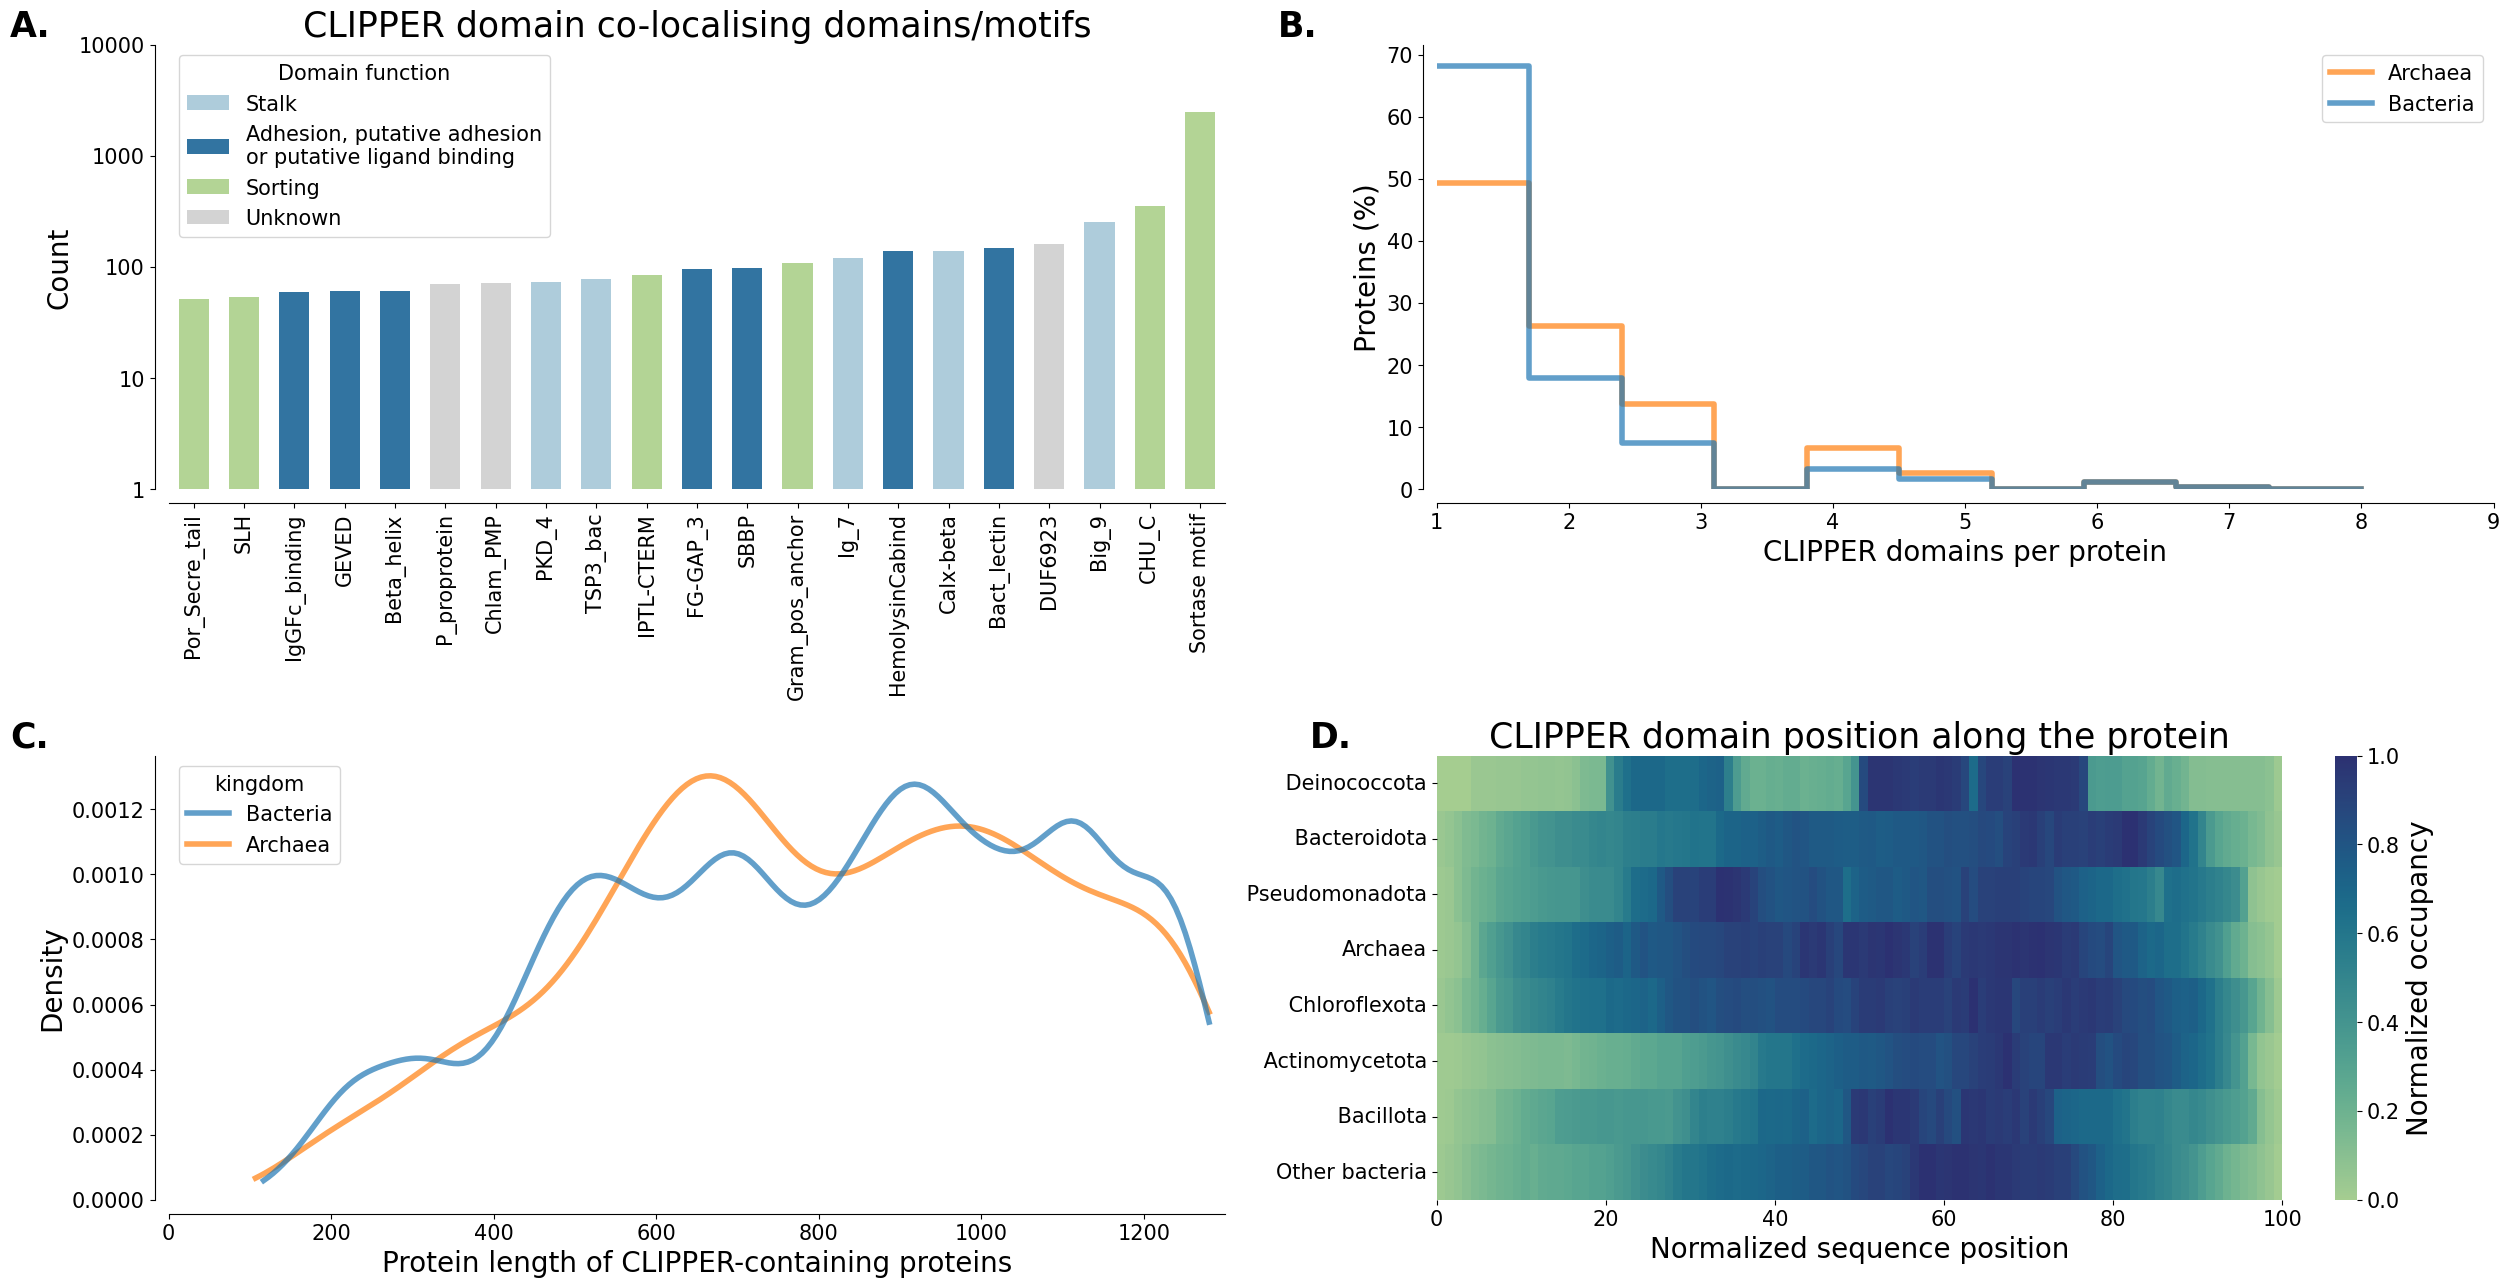

In [23]:
fig, axs = plt.subplots(figsize=[30, 15], nrows=2, ncols=2,)
plt.subplots_adjust(hspace=.6, wspace=0.2)

ax1 = axs[0,0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]

# 1
ax = ax1
# Domains co-localising with DUF11/DUF7507
ib_proteins = str_df[(str_df["probability"]>.65)&\
            (str_df["kingdom"].isin(["Bacteria", "Archaea"])&(str_df["pfamA_id"].isin(["DUF11"])))\
        &(~str_df["pfamA_id"].isin(non_isopep))]["uniprot_acc"].unique()
ib_domains = str_df[(str_df["probability"]>.65)&(str_df["kingdom"]\
                                    .isin(["Bacteria", "Archaea"]))&(~str_df["pfamA_id"].isin(non_isopep))]["pfamA_acc"].unique()
d_df_domains = strd_df[(strd_df["uniprot_acc"].isin(ib_proteins))&(~strd_df["pfamA_acc"].isin(ib_domains))]["pfamA_acc"].unique()
count_df = strd_df[(strd_df["uniprot_acc"].isin(ib_proteins))&(~strd_df["pfamA_acc"].isin(ib_domains))].value_counts(["pfamA_acc", "pfamA_id"]).reset_index()
adhesin = adh_df["pfamA_acc"].unique()
stalk = stalk_df["pfamA_acc"].unique()
sorting = ["Por_Secre_tail", "CHU_C", "Sortase motif", "Gram_pos_anchor",
            "SLH", "IPTL-CTERM", "WxL"]
putative_adhesin = ["Big_8", "VWA_2", "FG-GAP_3", "HemolysinCabind", "SprB",
                   "RCC1", "Beta_helix", "RCC1_2", "SBBP", "LTD", "NosD", "FG-GAP_2",
                   "PA", "K319L-like_PKD", "LysM", "pAdhesive_15", "TED_2",
                   "GEVED", "IgGFc_binding"]

plot_df = count_df.query("count>50").sort_values("count")
plot_df["count"] = plot_df["count"].apply(np.log10)
plot_df["Domain function"] = "Unknown"
# MErge adhesion and putative adhesion
plot_df.loc[plot_df["pfamA_acc"].isin(adhesin), "Domain function"] = "Adhesion, putative adhesion\nor putative ligand binding"
plot_df.loc[plot_df["pfamA_id"].isin(putative_adhesin), "Domain function"] = "Adhesion, putative adhesion\nor putative ligand binding"
plot_df.loc[plot_df["pfamA_acc"].isin(stalk), "Domain function"] = "Stalk"
plot_df.loc[plot_df["pfamA_id"].isin(sorting), "Domain function"] = "Sorting"

cmap = sns.color_palette("Paired", 3)
g=sns.barplot(plot_df, y="count", x="pfamA_id", 
              palette={"Sorting":cmap[2], 'Stalk':cmap[0], 'Adhesion, putative adhesion\nor putative ligand binding':cmap[1],
                       'Unknown':"lightgray"}, 
              ax=ax, hue="Domain function",
              hue_order=["Stalk", "Adhesion, putative adhesion\nor putative ligand binding", "Sorting", "Unknown"],
             width=.6)

g.tick_params(axis='x', rotation=90)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
sns.despine(ax=ax, offset=10)
ax.set_xlabel("")
ax.set_title("CLIPPER domain co-localising domains/motifs")
ax.set_ylabel("Count")
ax.set_yticks([0, 1, 2, 3, 4], [0, 1, 2, 3, 4])
ax.set_yticklabels([10**eval(i.get_text()) for i in ax.get_yticklabels()])

# 2
ax = ax2

plot_df = str_df[(str_df["kingdom"].isin(["Bacteria", "Archaea"]))&(str_df["probability"]>.65)\
    &(str_df["pfamA_id"].isin(["DUF11"]))].value_counts(["kingdom", "uniprot_acc"]).reset_index()

sns.histplot(plot_df, x="count", fill=False, element='step', bins=10, hue="kingdom", common_norm=False, stat="percent", 
             ax=ax, lw=4, alpha=.7)

ax.set_xlabel("CLIPPER domains per protein")
ax.set_ylabel("Proteins (%)")
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sns.despine(offset=10, ax=ax)
ax.set_xlim([1,9])
ax.legend(title='', labels=["Archaea", "Bacteria"])

# 3
ax = ax3
clipper_proteins = str_df[(str_df["kingdom"].isin(["Bacteria", "Archaea"]))&(str_df["probability"]>.65)\
    &(str_df["pfamA_id"].isin(["DUF11"]))]["uniprot_acc"].unique()
sns.kdeplot(seq_df[seq_df["uniprot_acc"].isin(clipper_proteins)], x="len", ax=ax, cut=0,
    hue="kingdom", common_norm=False, lw=4, alpha=.7)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
sns.despine(ax=ax, offset=10)
ax.set_xlabel("Protein length of CLIPPER-containing proteins")
ax.set_xlim([0,1300])

# 4
ax = ax4
# Consider first 6 for Bac
phylum_to_consider = bins_df[bins_df["kingdom"]=="Bacteria"].value_counts(["kingdom", "phylum"]).reset_index()["phylum"].to_list()[:6]

plot_df = bins_df.copy()
plot_df.loc[plot_df["kingdom"]=="Archaea", "phylum"] = "Archaea"
plot_df.loc[(~plot_df["phylum"].isin(phylum_to_consider))&(plot_df["kingdom"]=="Bacteria"), "phylum"] = "Other bacteria"
plot_df.loc[(plot_df["phylum"].str.contains("Candidatus"))&(plot_df["kingdom"]=="Bacteria"), "phylum"] = "Other bacteria"
plot_df = plot_df.groupby(["kingdom", "phylum"]).sum()
# Normalise by max row value
plot_df = plot_df.div(plot_df.max(axis=1), axis=0).round(2).reset_index().set_index("phylum")
plot_df.pop("kingdom")
# Perform hierarchical clustering on rows
linkage_matrix = sch.linkage(plot_df, method='ward')
# Get the order of rows based on clustering
dendro = sch.dendrogram(linkage_matrix, no_plot=True)
row_order = dendro['leaves']
# Reorder the dataframe
plot_df_clustered = plot_df.iloc[row_order]
g=sns.heatmap(plot_df_clustered, cmap="crest", ax=ax, cbar_kws={"label": "Normalized occupancy"})
ax.set_ylabel("")
ax.set_xlabel("Normalized sequence position")
ax.set_xticks([i for i in range(0, 101, 20)], 
             [i for i in range(0, 101, 20)])
g.tick_params(axis='x', rotation=0)
ax.set_title("CLIPPER domain position along the protein", pad=20)

for i, ax in enumerate(fig.axes[:-1], start=1):
    ax.set_title(f"{chr(64+i)}.", loc="left", fontweight='bold', x=-0.15)

plt.savefig(os.path.join(FIGURES, "f4.png"), dpi=350, bbox_inches="tight", pad_inches=0)

## Figure S2

In [51]:
import matplotlib.text as mtext

class LegendTitle(object):
    def __init__(self, text_props=None):
        self.text_props = text_props or {}
        super(LegendTitle, self).__init__()

    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        title = mtext.Text(x0, y0, orig_handle, **self.text_props)
        handlebox.add_artist(title)
        return title

In [14]:
# Do at phylum level to constrain to a reasonable amount to display
str_df["superkingdom"] = str_df["taxonomy"].apply(lambda x: str(x).split(";")[0].replace(".", "").strip() if len(str(x).split(";")) >= 1 else None)
str_df["phylum"] = str_df["taxonomy"].apply(lambda x: str(x).split(";")[1].replace(".", "").strip() if len(str(x).split(";")) >= 5 else None)
str_df["class"] = str_df["taxonomy"].apply(lambda x: str(x).split(";")[-2].replace(".", "").strip() if len(str(x).split(";")) >= 5 else None)
str_df["genus"] = str_df["taxonomy"].apply(lambda x: str(x).split(";")[-1].replace(".", "").strip() if len(str(x).split(";")) >= 5 else None)

archaea = str_df[(str_df["probability"]>0.65)&(str_df["kingdom"]=="Archaea")]\
    .drop_duplicates("uniprot_acc")\
    .value_counts(["phylum", "kingdom"])\
    .reset_index()["phylum"] \
    .to_list()
    #.query("count>10")["genus"]\
bacteria = str_df[(str_df["probability"]>0.65)&(str_df["kingdom"]=="Bacteria")]\
    .drop_duplicates("uniprot_acc")\
    .value_counts(["phylum", "kingdom"])\
    .reset_index()["phylum"] \
    .to_list()
    #.query("count>100")["genus"]\

In [58]:
# Counts of domains co-localising with IB domains per organism genus

ib_proteins = str_df[(str_df["probability"]>.65)&(str_df["superkingdom"].isin(["Bacteria", "Archaea"]))&(~str_df["pfamA_id"].isin(non_isopep))]["uniprot_acc"].unique()
ib_domains = str_df[(str_df["probability"]>.65)&(str_df["superkingdom"].isin(["Bacteria", "Archaea"]))&(~str_df["pfamA_id"].isin(non_isopep))]["pfamA_acc"].unique()
d_df_domains = strd_df[(strd_df["uniprot_acc"].isin(ib_proteins))&(~strd_df["pfamA_acc"].isin(ib_domains))]["pfamA_acc"].unique()
count_df = strd_df[(strd_df["uniprot_acc"].isin(ib_proteins))&(~strd_df["pfamA_acc"].isin(ib_domains))]
# Add genus information
count_df = pd.merge(count_df, str_df[["uniprot_acc", "superkingdom", "phylum"]]).drop_duplicates()

# Group genera with low counts into other archaea/bacteria
#count_df.loc[(count_df["kingdom"]=="Archaea")&(~count_df["genus"].isin(archaea)), "genus"] = "Other archaea"
#count_df.loc[(count_df["kingdom"]=="Bacteria")&(~count_df["genus"].isin(bacteria)), "genus"] = "Other bacteria"

# Count values
plot_df = count_df.value_counts(["superkingdom", "phylum", "pfamA_acc", "pfamA_id"]).reset_index()

adhesin = adh_df["Name"].unique()
stalk = stalk_df["Name"].unique()
sorting = ["Por_Secre_tail", "CHU_C", "Sortase motif", "Gram_pos_anchor",
            "SLH", "IPTL-CTERM", "WxL", "YSIRK_signal"]
putative_adhesin = ["Big_8", "VWA_2", "FG-GAP_3", "HemolysinCabind", "SprB",
                   "RCC1", "Beta_helix", "RCC1_2", "SBBP", "LTD", "NosD", "FG-GAP_2",
                   "PA", "K319L-like_PKD", "LysM", "pAdhesive_15", "TED_2",
                   "GEVED", "IgGFc_binding", "YNCE", "TSP_3"]

plot_df["Domain function"] = "Unknown/other function"
# MErge adhesion and putative adhesion
plot_df.loc[plot_df["pfamA_id"].isin(adhesin), "Domain function"] = "Adhesion, putative adhesion\nor putative ligand binding"
plot_df.loc[plot_df["pfamA_id"].isin(putative_adhesin), "Domain function"] = "Adhesion, putative adhesion\nor putative ligand binding"
plot_df.loc[plot_df["pfamA_id"].isin(stalk), "Domain function"] = "Stalk"
plot_df.loc[plot_df["pfamA_id"].isin(sorting), "Domain function"] = "Sorting"

# Consider only domains with more than X counts (and all archaea domains)
domains_to_consider = list(plot_df[plot_df["superkingdom"]=="Archaea"]["pfamA_id"].unique()) + list(plot_df[plot_df["count"]>50]["pfamA_id"].unique())
plot_df = plot_df[plot_df["pfamA_id"].isin(domains_to_consider)]\
    .sort_values(["Domain function", "count"], ascending=[True, False])\
    .pivot(index=["superkingdom", "phylum"], 
            columns=["Domain function", "pfamA_id"], values="count").fillna(0).astype(int)
# Apply log10 and replace inf with 0
plot_df = plot_df.apply(np.log10)

# Invert 
plot_df = plot_df.T

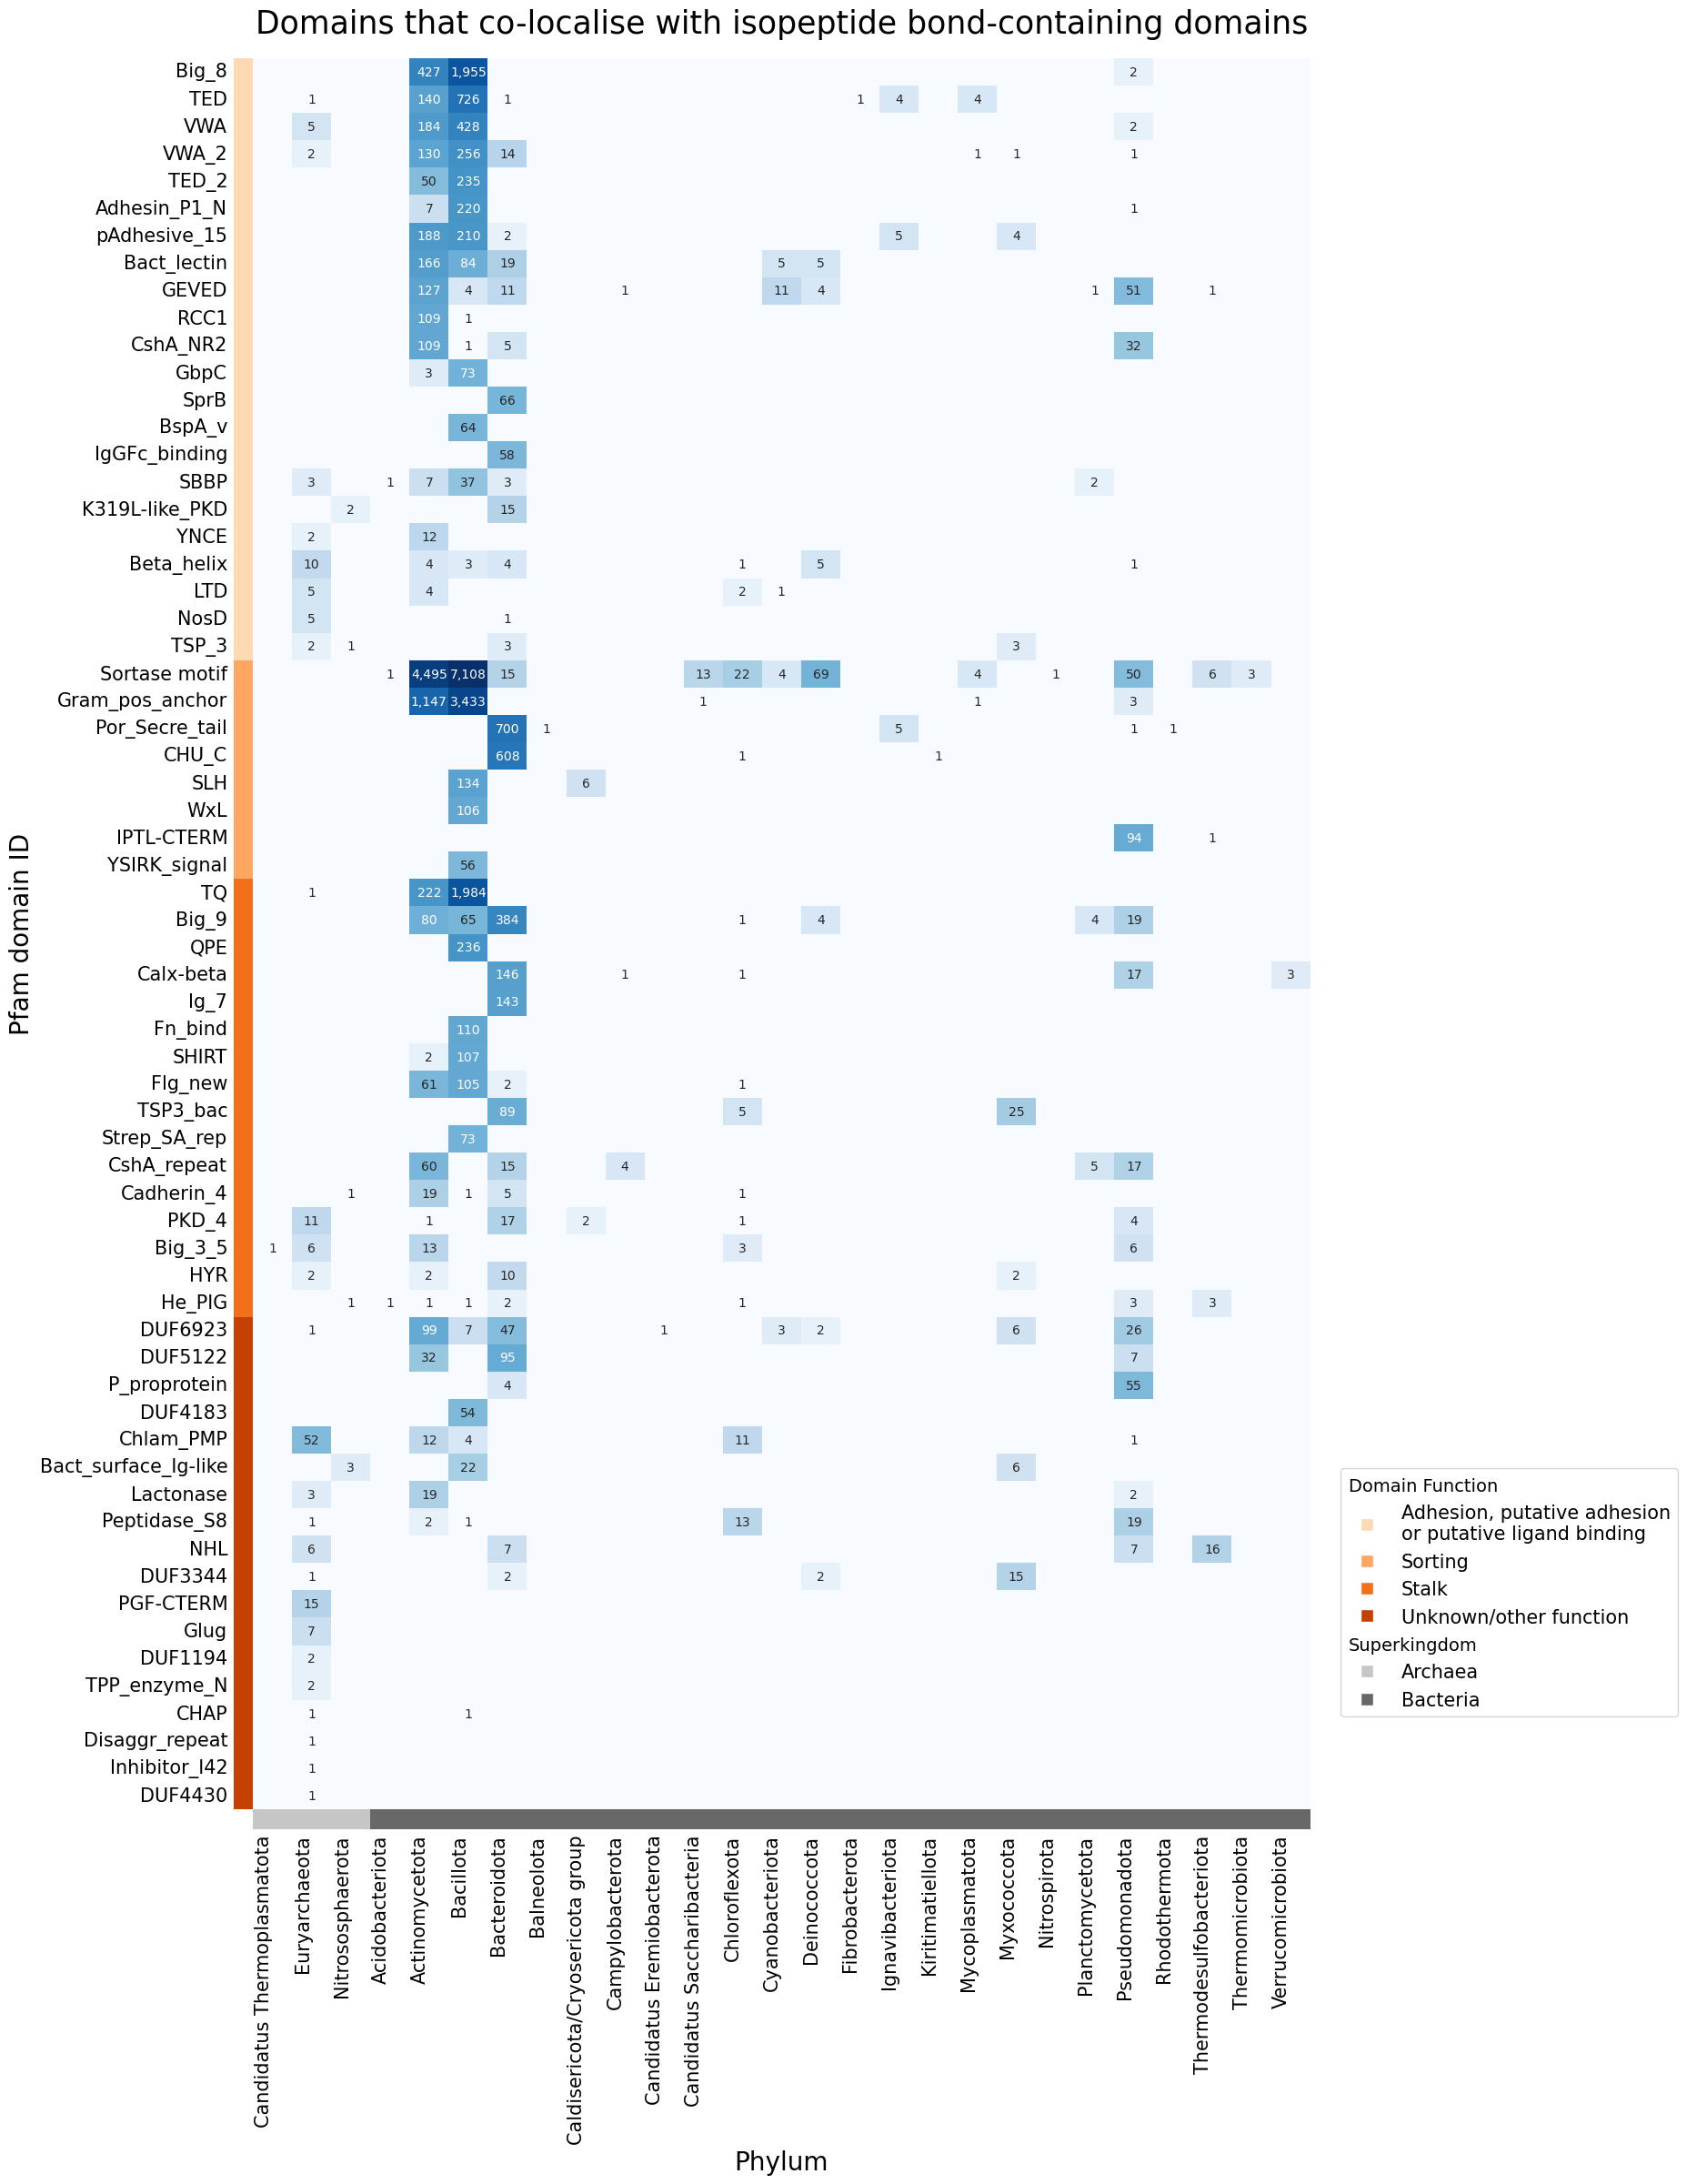

In [62]:
# Define color mappings
domain_functions = plot_df.index.get_level_values(0).unique()
superkingdoms = plot_df.columns.get_level_values(0).unique()

col_lut = dict(zip(superkingdoms, sns.color_palette("Grays", n_colors=len(superkingdoms))))
row_lut = dict(zip(domain_functions, sns.color_palette("Oranges", n_colors=len(domain_functions))))

row_colors = plot_df.index.get_level_values(0).map(row_lut)
col_colors = plot_df.columns.get_level_values(0).map(col_lut)

fig, ax = plt.subplots(figsize=[15, 25])

filled_df = plot_df.replace([np.inf, -np.inf], 0)
g=sns.heatmap(
    filled_df,
    cmap="Blues",
    annot=np.vectorize(lambda x: 10**x)(plot_df),
    fmt=",.0f",
    annot_kws={"fontsize": 10},
)

# Hide text for 0
for text in ax.texts:
    if text.get_text() == "0":
        text.set_visible(False)

g.collections[0].colorbar.remove()
# Adjust y-axis tick labels
ax.tick_params(axis='y', which='major', pad=20, length=0)
ax.set_yticklabels(plot_df.index.get_level_values(1), rotation=0)

# Adjust x-axis tick labels
ax.tick_params(axis='x', which='major', pad=20, length=0)
ax.set_xticklabels(plot_df.columns.get_level_values(1), rotation=90, ha="right")

# Add row color indexing right next to the heatmap
for i, color in enumerate(row_colors):
    ax.add_patch(plt.Rectangle(xy=(-0.5, i), width=0.5, height=1, color=color, lw=0,
                               transform=ax.transData, clip_on=False))

# Add column color indexing on top of the heatmap
for i, color in enumerate(col_colors):
    ax.add_patch(plt.Rectangle(xy=(i, -0.0115), width=1, height=0.0115, color=color, lw=0,
                               transform=ax.get_xaxis_transform(), clip_on=False))

# Legend
row_handles, row_labels = zip(*[(plt.Line2D([0], [0], marker='s', color='w', 
                                            markerfacecolor=row_lut[k], markersize=10), k) 
                                for k in row_lut.keys()])

col_handles, col_labels = zip(*[(plt.Line2D([0], [0], marker='s', color='w', 
                                            markerfacecolor=col_lut[k], markersize=10), k) 
                                for k in col_lut.keys()])

# Merge legends
handles = ['Domain Function'] + list(row_handles) + ['Superkingdom'] + list(col_handles)
labels = [''] + list(row_labels) + [''] + list(col_labels)

# Create final legend
ax.legend(handles, labels, handler_map={str: LegendTitle({'fontsize': 14})}, 
          bbox_to_anchor=(1.02, .2), loc='upper left', frameon=True)

ax.set_title("Domains that co-localise with isopeptide bond-containing domains", pad=20)
ax.set_xlabel("Phylum")
ax.set_ylabel("Pfam domain ID")

plt.savefig(os.path.join(FIGURES, "S2.png"), dpi=350, bbox_inches="tight", pad_inches=0)

## Figure S3

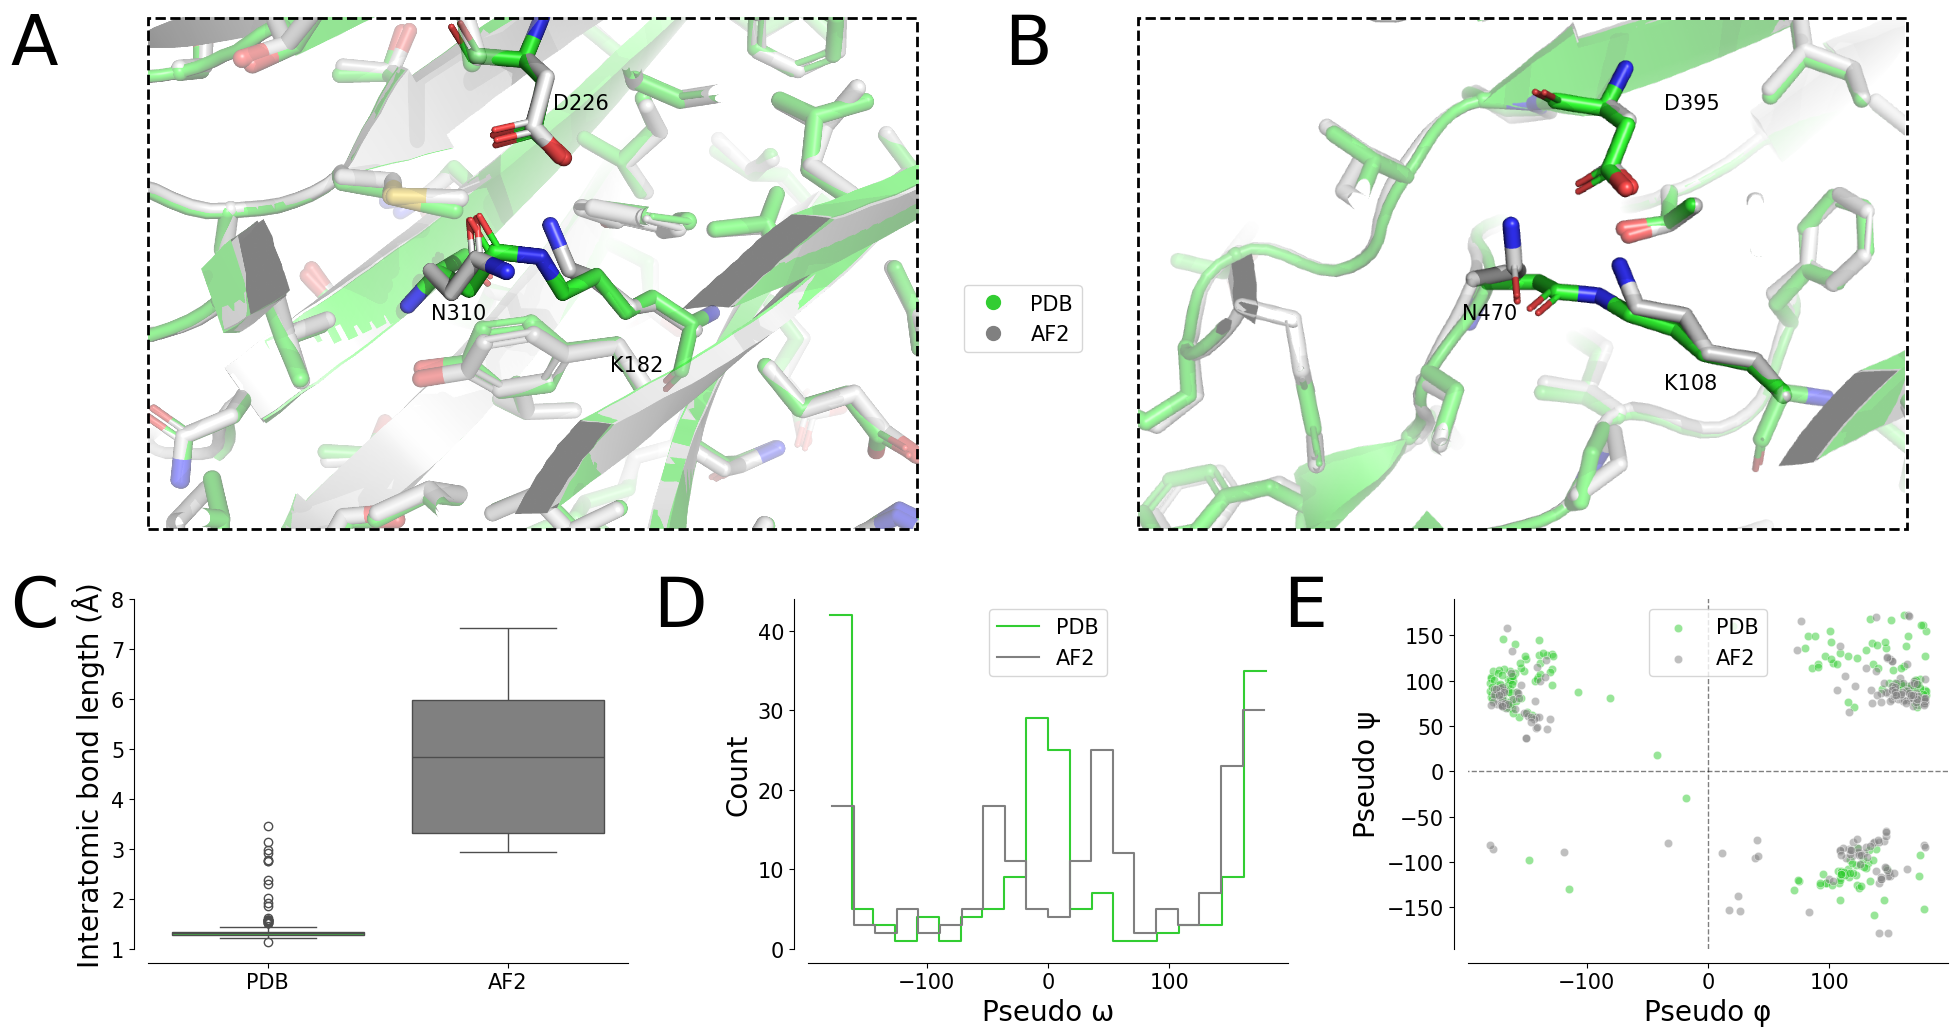

In [64]:
fig = plt.figure(figsize=[20, 10])
gs = gridspec.GridSpec(nrows=2, ncols=6, figure=fig, width_ratios=[1, 1, 1, 1, 1, 1])

# Make plots spanning multiple axes
ax1 = fig.add_subplot(gs[0, :3])
ax2 = fig.add_subplot(gs[0, 3:])
ax3 = fig.add_subplot(gs[1, 0:2])
ax4 = fig.add_subplot(gs[1, 2:4])
ax5 = fig.add_subplot(gs[1, 4:6])

# 1
ax = ax1
ax.axis("off")
# Image of isopep bond
arr_img = plt.imread("../data/input_figures/5xcb_182_226_310_af_vs_pdb.png")
cropped_img = arr_img[200:1500, :]
im = OffsetImage(cropped_img, zoom=0.35)
ab = AnnotationBbox(im, xy=(0, 0), xybox=(0, 0), box_alignment=(0, 0), bboxprops=dict(color="white"))
ax.add_artist(ab)

# Box around
box = mpl.patches.Rectangle(
    (0.5 - 1 / 2, 0.5 - 1 / 2),  # Lower-left corner
    .95,
    1.46,
    edgecolor="black",
    linewidth=2,
    linestyle="--",
    facecolor="none", 
    zorder=100,
    clip_on=False
)
ax.add_patch(box)

ax.text(x=.57, y=.45, s="K182")
ax.text(x=.35, y=.6, s="N310")
ax.text(x=.5, y=1.2, s="D226")

# Legend
legend_elements = [
    Line2D([0], [0], marker="o", color="limegreen", lw=0, ms=10, label="PDB"),
    Line2D([0], [0], marker="o", color="gray", lw=0, ms=10, label="AF2"),
]

legend = ax.legend(
    handles=legend_elements,
    loc="center",
    bbox_to_anchor=(1.08, 0.6),
    frameon=True,
)

# 2
ax = ax2
ax.axis("off")
# Image of isopep bond
arr_img = plt.imread("../data/input_figures/6m3y_108_395_470_af_vs_pdb.png")
cropped_img = arr_img[150:760, 300:1220]
im = OffsetImage(cropped_img, zoom=0.6)
ab = AnnotationBbox(im, xy=(0, 0), xybox=(0, 0), box_alignment=(0, 0), bboxprops=dict(color="white"))
ax.add_artist(ab)

# Add box around
box = mpl.patches.Rectangle(
    (0.5 - 1 / 2, 0.5 - 1 / 2),  # Lower-left corner
    .95,
    1.46,
    edgecolor="black",
    linewidth=2,
    linestyle="--",
    facecolor="none", 
    zorder=100,
    clip_on=False
)
ax.add_patch(box)

ax.text(x=.65, y=.4, s="K108")
ax.text(x=.4, y=.6, s="N470")
ax.text(x=.65, y=1.2, s="D395")

# 3
ax = ax3
sns.boxplot(x=1, y=dt_df["bond_length"].to_list(), ax=ax, color="limegreen")
sns.boxplot(x=0, y=af_df["bond_length"].to_list(), ax=ax, color="gray")
ax.set_xticks([0,1], ["PDB", "AF2"])
ax.set_ylabel("Interatomic bond length (Å)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim([1,8])
sns.despine(offset=10, ax=ax)

# 4
ax = ax4
sns.histplot(dt_df["pseudo_omega"].to_list(), ax=ax, fill=False, element="step", bins=20, label="PDB", color="limegreen")
sns.histplot(af_df["pseudo_omega"].to_list(), ax=ax,fill=False, element="step", bins=20, label="AF2", color="gray")
ax.legend(loc="upper center")
ax.set_xlabel("Pseudo ω")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.despine(offset=10, ax=ax)

# 5
ax = ax5
sns.scatterplot(dt_df, x="pseudo_phi", y="pseudo_psi", ax=ax, label="PDB", color="limegreen", alpha=.5)
sns.scatterplot(af_df, x="pseudo_phi", y="pseudo_psi", ax=ax, label="AF2", color="gray", alpha=.5)

ax.axvline(0, -181, 181, linewidth=1, color="black", ls="--", alpha=.5)
ax.axhline(0, -181, 181, linewidth=1, color="black", ls="--", alpha=.5)

ax.legend(loc="upper center")
ax.set_xlabel("Pseudo φ")
ax.set_ylabel("Pseudo ψ")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.despine(offset=10, ax=ax)


plt.subplots_adjust(hspace=.2, wspace=1.2, left=0, right=.9)

plt.text(-1400,780, "A", fontsize=ANNOT_FONT_SIZE)
plt.text(-580,780, "B", fontsize=ANNOT_FONT_SIZE)
plt.text(-1400,160, "C", fontsize=ANNOT_FONT_SIZE)
plt.text(-870,160, "D", fontsize=ANNOT_FONT_SIZE)
plt.text(-350,160, "E", fontsize=ANNOT_FONT_SIZE)


plt.savefig(os.path.join(FIGURES, "sf3.png"), dpi=350, bbox_inches="tight", transparent=True)

plt.show()

## Figure S4

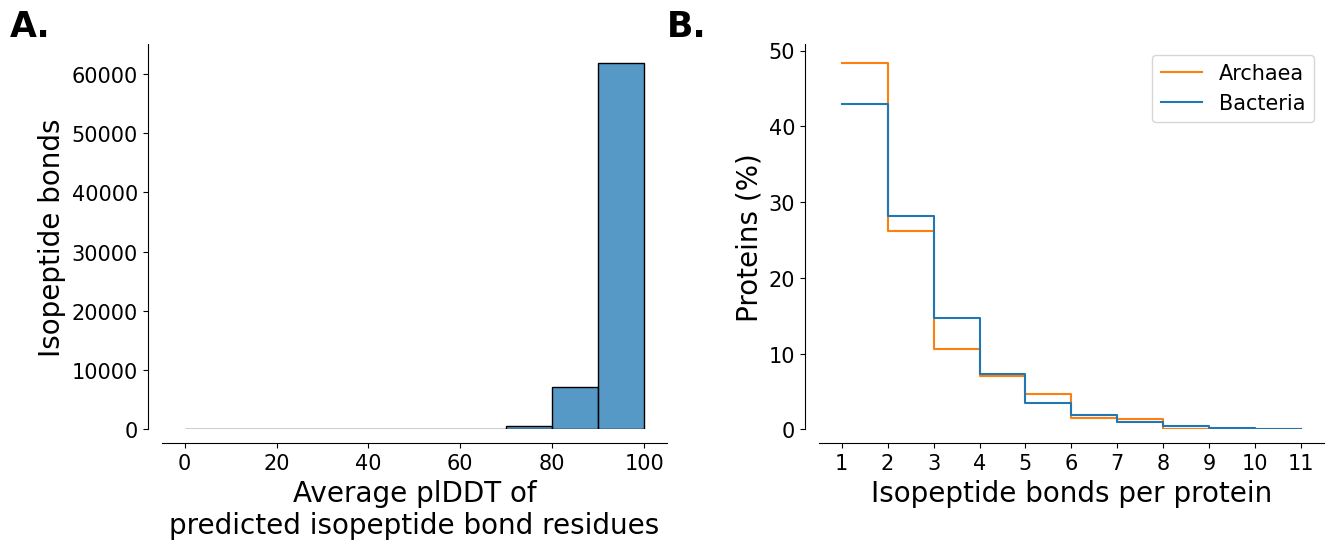

In [14]:
fig, axs = plt.subplots(ncols=2, figsize=[15,5])

# 1
ax=axs[0]
plot_df = str_df[(~str_df["taxonomy"].isna())&(str_df["probability"]>.65)].copy()
plot_df["mean_plddt"] = plot_df.apply(lambda x: np.mean([x["r1_plddt"], x["r2_plddt"], x["r3_plddt"]]), axis=1)
sns.histplot(data=plot_df, x="mean_plddt", bins=10, binrange=[0,100], ax=ax)
sns.despine(offset=10, ax=ax)
ax.set_ylabel("Isopeptide bonds")
ax.set_xlabel("Average plDDT of\npredicted isopeptide bond residues")

# 2
ax=axs[1]
plot_df = str_df[(str_df["kingdom"].isin(["Bacteria", "Archaea"]))&(str_df["probability"]>.65)\
    ].value_counts(["kingdom", "uniprot_acc"]).reset_index()

sns.histplot(plot_df, x="count", fill=False, element='step', 
            bins=10, hue="kingdom", common_norm=False, stat="percent", ax=ax)

ax.set_xlabel("Isopeptide bonds per protein")
ax.set_ylabel("Proteins (%)")
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sns.despine(offset=10, ax=ax)
ax.legend(title='', labels=["Archaea", "Bacteria"])

#
for i, ax in enumerate(fig.axes, start=1):
    ax.set_title(f"{chr(64+i)}.", loc="left", fontweight='bold', x=-0.3)

plt.subplots_adjust(hspace=3, wspace=0.3)

plt.savefig(os.path.join(FIGURES, "fs4.png"), dpi=350, transparent=True, bbox_inches="tight")

In [59]:
len(plot_df[(plot_df["kingdom"]=="Archaea")&(plot_df["count"]==1)]) / len(plot_df[(plot_df["kingdom"]=="Archaea")])

0.48383233532934133

## Figure S5

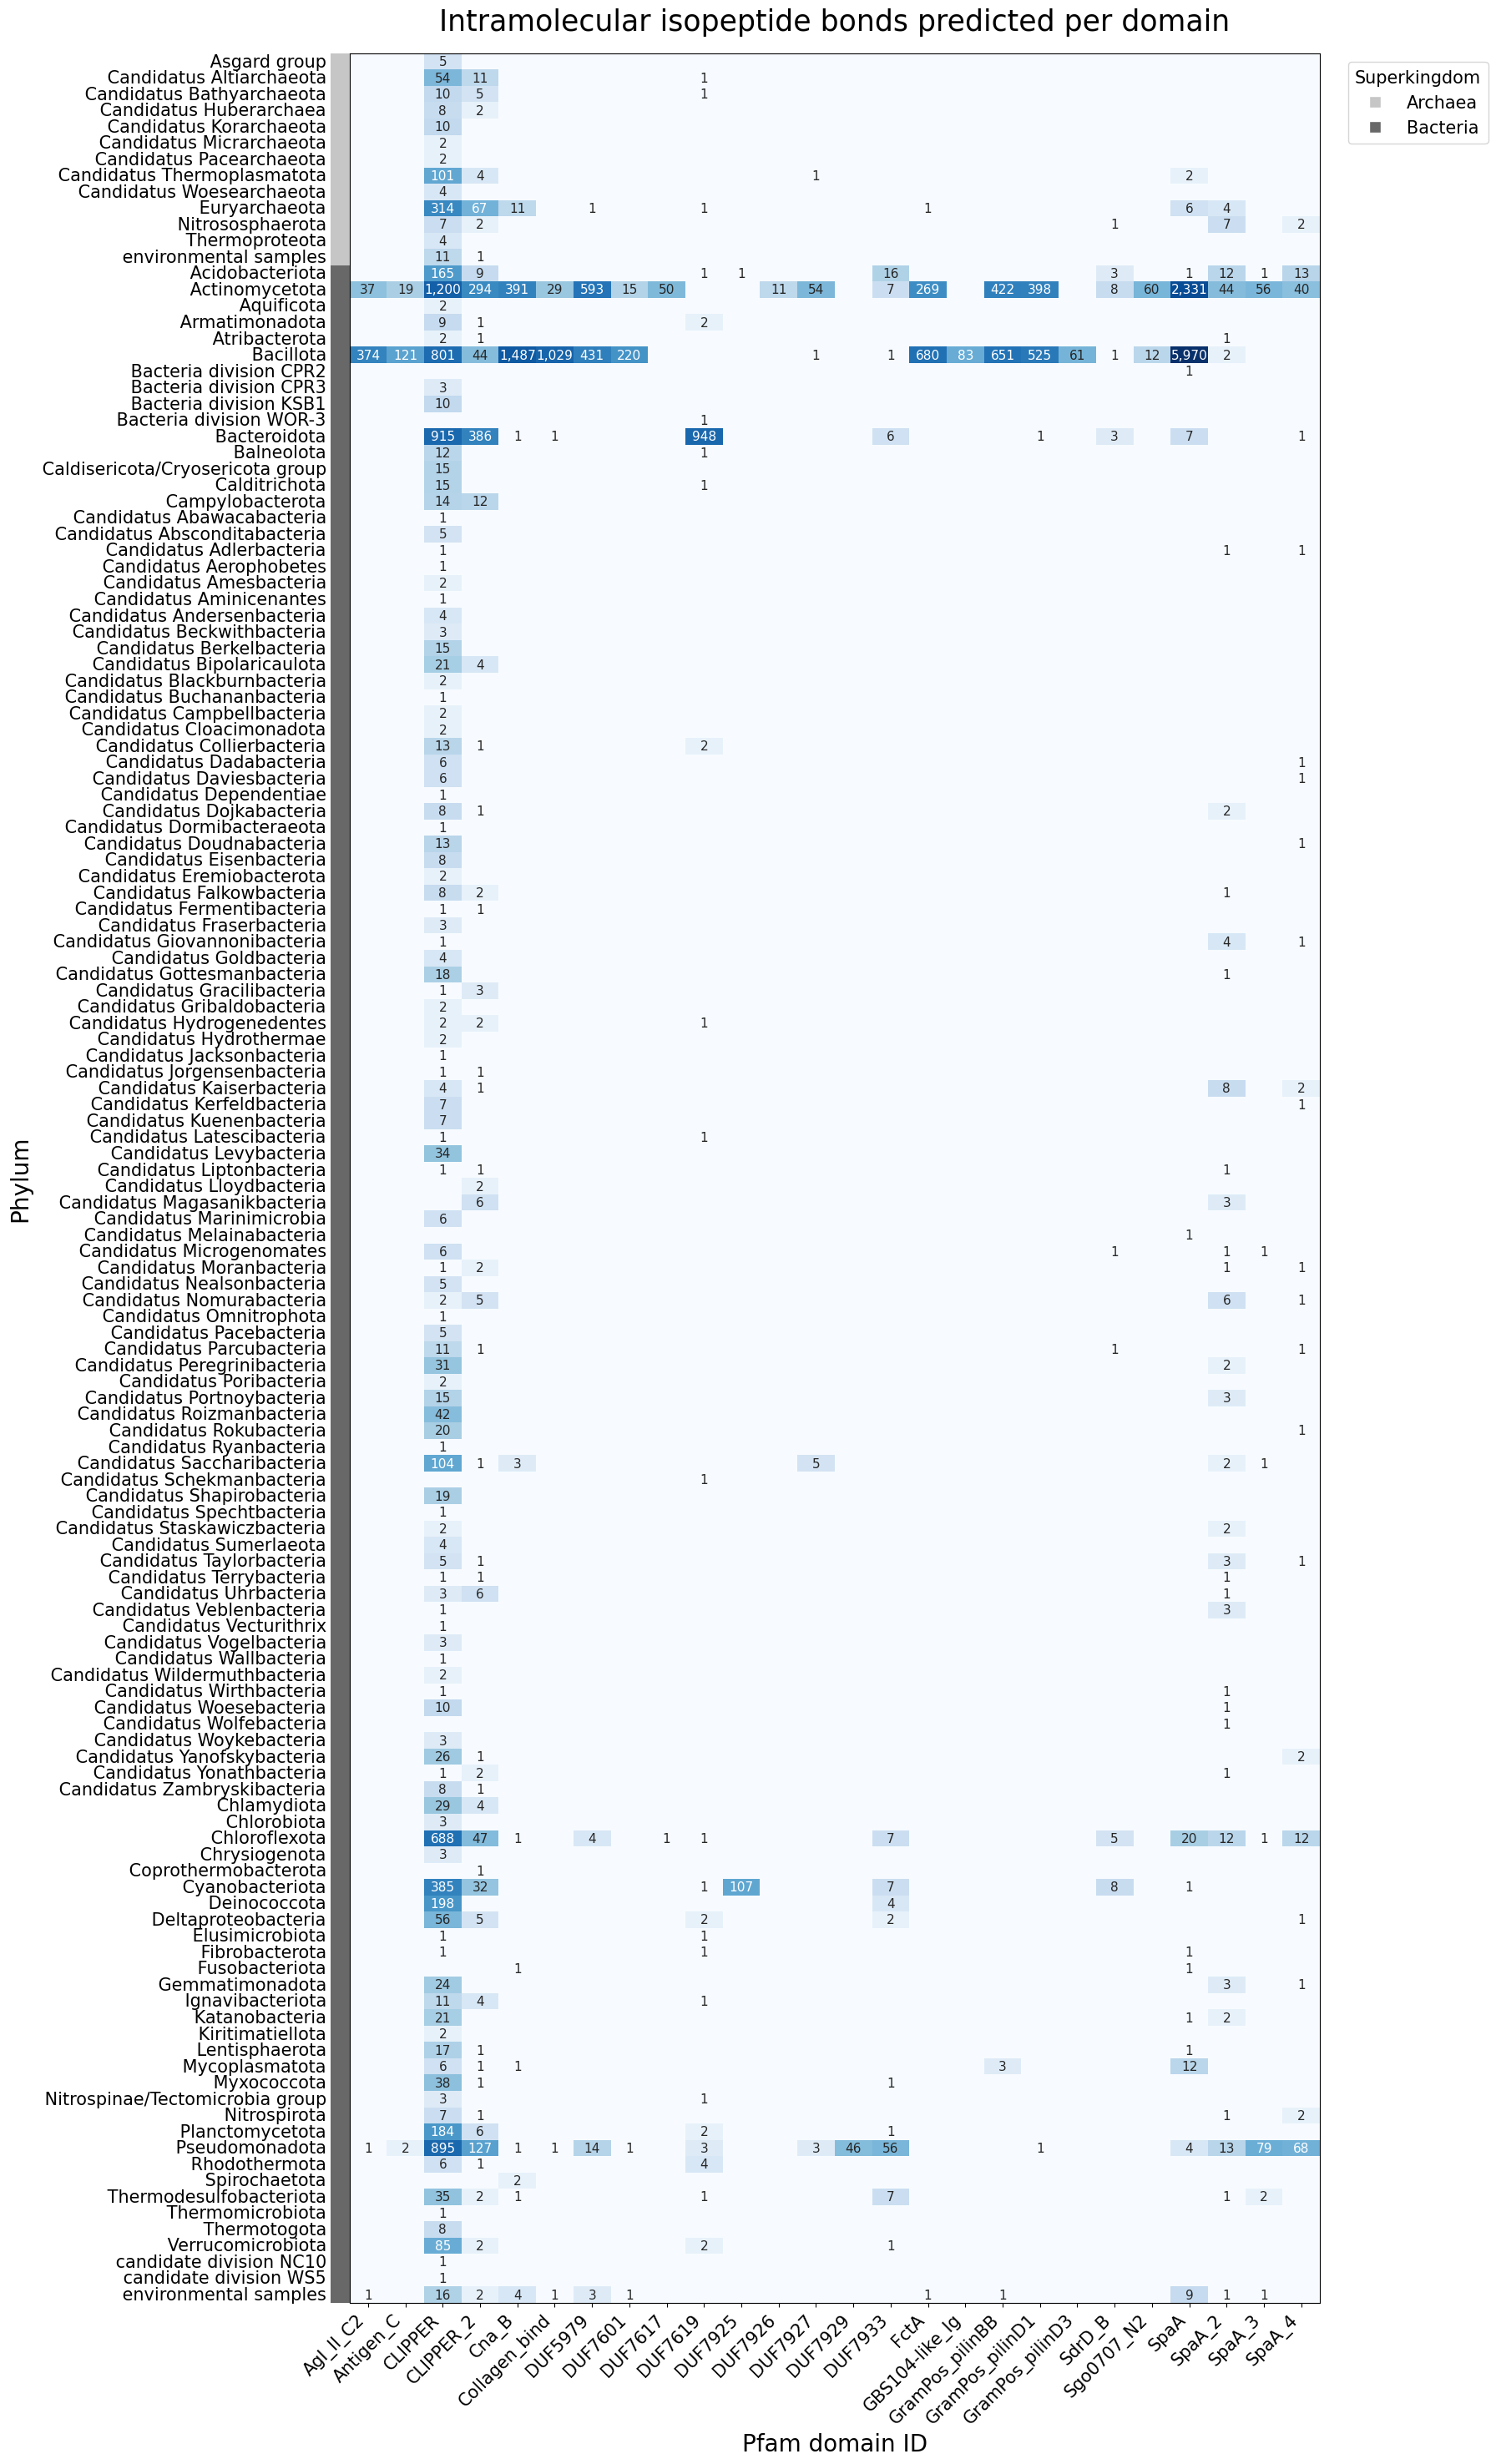

In [82]:
fig, ax = plt.subplots(figsize=[15, 35])

plot_df = str_df[(str_df["probability"]>.65)&(~str_df["taxonomy"].isna())].drop_duplicates("uniprot_acc").copy()
plot_df["phyla"] = plot_df[(plot_df["kingdom"].isin(["Bacteria", "Archaea"]))] \
                    ["taxonomy"].apply(lambda x: x.split(";")[1].replace(".", "") if len(x.split(";")) >= 2 else np.NaN)
plot_df["pfamA_id"] = plot_df[(plot_df["pfamA_id"].isin(isopep))]["pfamA_id"].fillna("Not annotated").replace({"DUF11":"CLIPPER", "DUF7507":"CLIPPER_2"})
plot_df = plot_df.value_counts(["kingdom", "phyla", "pfamA_id"]).reset_index() \
                 .sort_values(["kingdom", "phyla", "count"], ascending=False) \
                 .pivot(index=["kingdom", "phyla"], columns="pfamA_id", values="count").fillna(0) \
                 .apply(np.log10)

filled_df = plot_df.replace([np.inf, -np.inf], 0)
g=sns.heatmap(
    filled_df,
    cmap="Blues",
    annot=np.vectorize(lambda x: 10**x)(plot_df),
    fmt=",.0f",
    annot_kws={"fontsize": 11},
    yticklabels=True
)
g.collections[0].colorbar.remove()

# Hide text for 0
for text in ax.texts:
    if text.get_text() == "0":
        text.set_visible(False)

# Add countour lines
for _, spine in ax.spines.items():
    spine.set_visible(True)

# Define color mappings
superkingdoms = plot_df.index.get_level_values(0).unique()
row_lut = dict(zip(superkingdoms, sns.color_palette("Grays", n_colors=len(superkingdoms))))
row_colors = plot_df.index.get_level_values(0).map(row_lut)

# Adjust y-axis tick labels
ax.tick_params(axis='y', which='major', pad=20, length=0)
ax.set_yticklabels(plot_df.index.get_level_values(1), rotation=0)

# Add row color indexing right next to the heatmap
for i, color in enumerate(row_colors):
    ax.add_patch(plt.Rectangle(xy=(-0.5, i), width=0.5, height=1, color=color, lw=0,
                               transform=ax.transData, clip_on=False))

# Legend
row_legend_patches = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=row_lut[k], markersize=10, label=k)
                       for k in row_lut.keys()]
ax.legend(handles=row_legend_patches, title="Superkingdom", bbox_to_anchor=(1.02, 1), loc='upper left')

g.set_yticklabels(g.get_yticklabels(), rotation=0)
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')
ax.set_title("Intramolecular isopeptide bonds predicted per domain", pad=20)
ax.set_ylabel("Phylum")
ax.set_xlabel("Pfam domain ID")

plt.savefig(os.path.join(FIGURES, "sf5.png"), dpi=350, bbox_inches="tight", pad_inches=0)

In [76]:
plot_df.index.get_level_values(1)

Index([' Asgard group', ' Candidatus Altiarchaeota',
       ' Candidatus Bathyarchaeota', ' Candidatus Huberarchaea',
       ' Candidatus Korarchaeota', ' Candidatus Micrarchaeota',
       ' Candidatus Pacearchaeota', ' Candidatus Thermoplasmatota',
       ' Candidatus Woesearchaeota', ' Euryarchaeota',
       ...
       ' Pseudomonadota', ' Rhodothermota', ' Spirochaetota',
       ' Thermodesulfobacteriota', ' Thermomicrobiota', ' Thermotogota',
       ' Verrucomicrobiota', ' candidate division NC10',
       ' candidate division WS5', ' environmental samples'],
      dtype='object', name='phyla', length=138)

## Figure S6

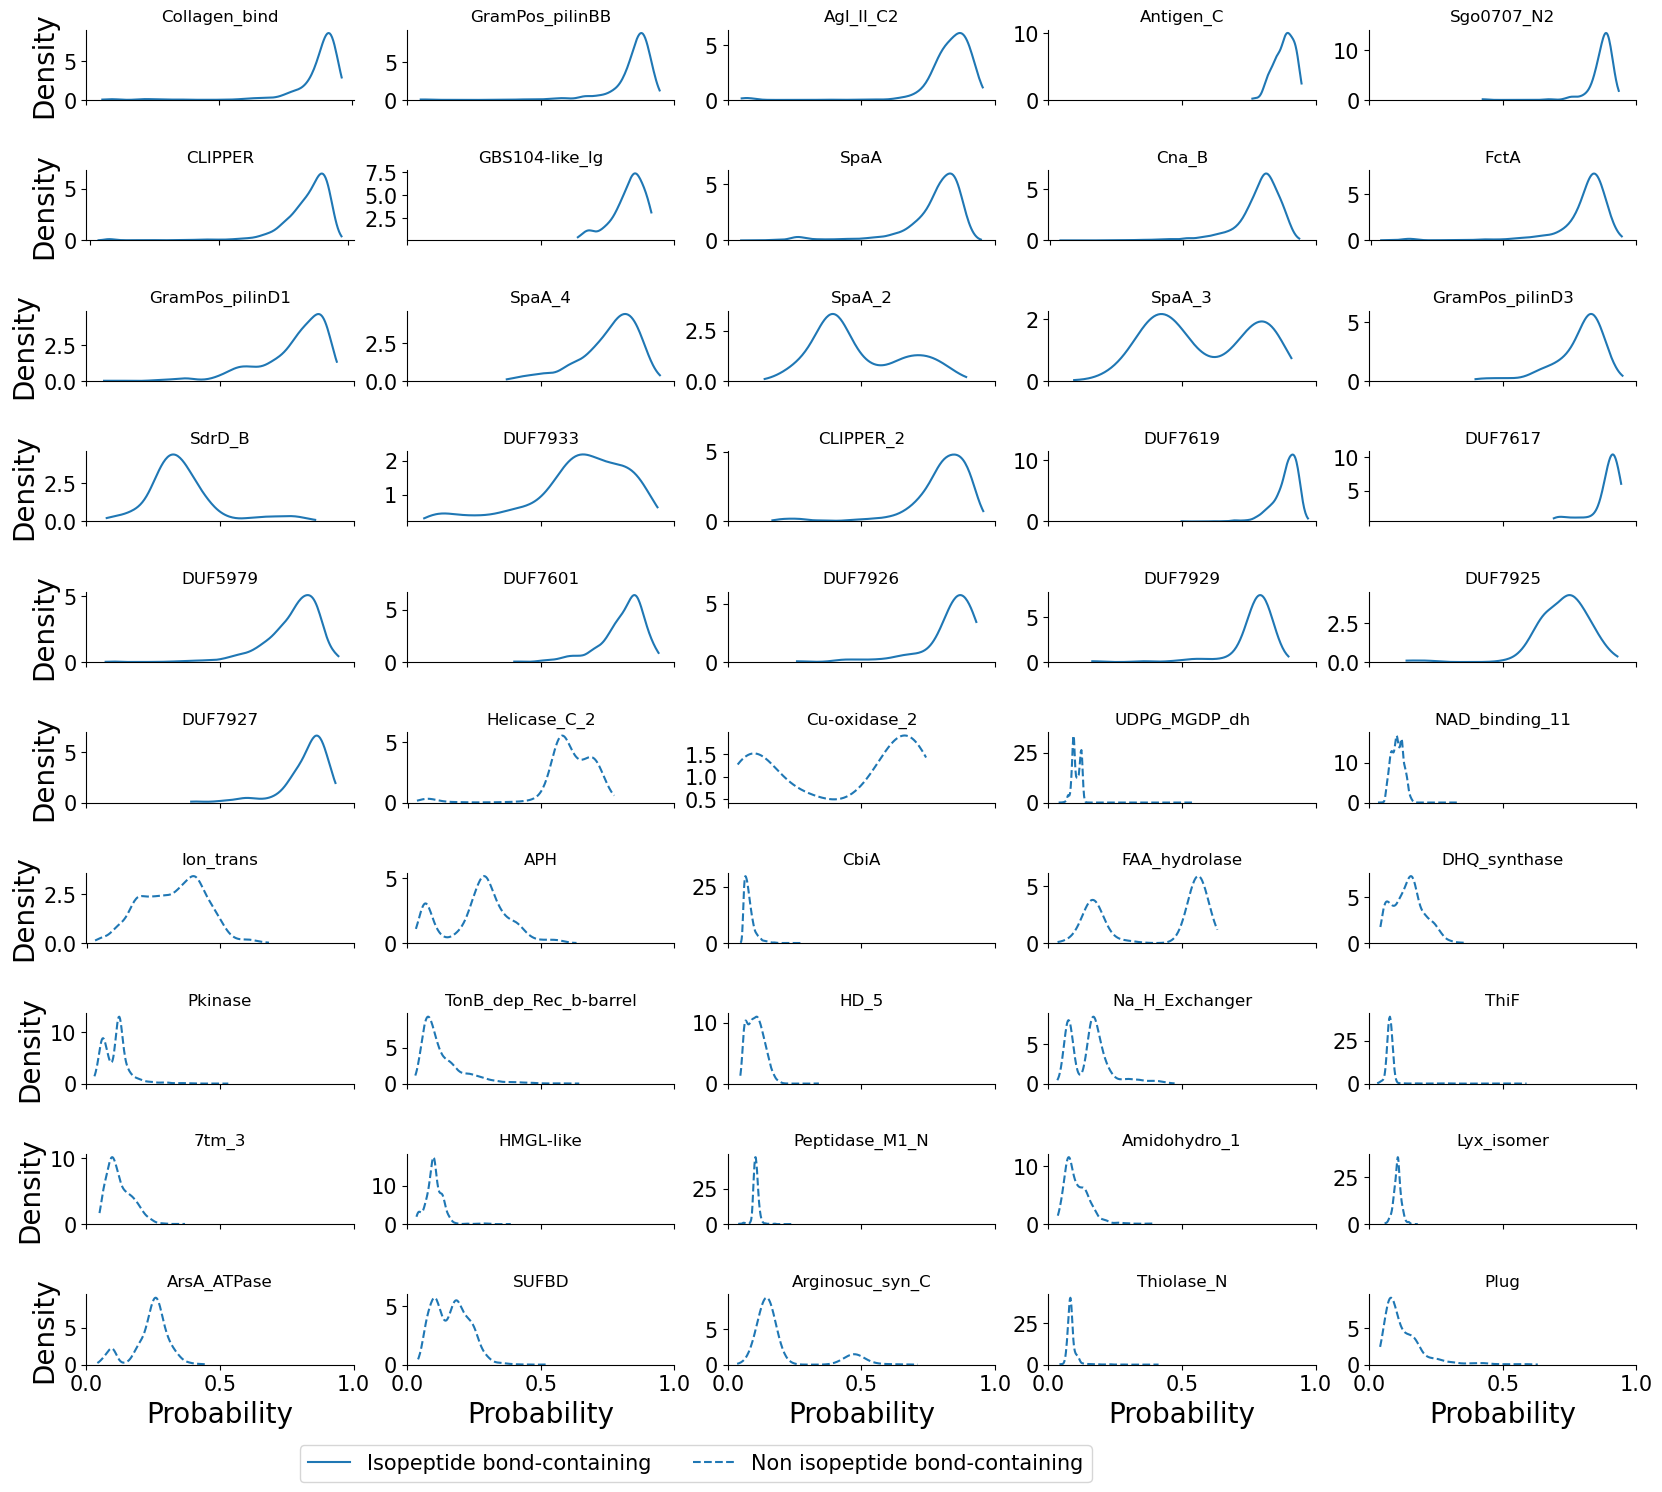

In [14]:
# Keep only the match with lower rmsd per domain

nrows=10
ncols=5

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=[20,15])
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=None, hspace=1)

axes = [[row, col] for row in range(nrows) for col in range(ncols)]
for indx, pfamA_id in zip(axes, isopep + ["Helicase_C_2", "Cu-oxidase_2"] + str_df[~str_df["pfamA_id"]\
                          .isin(isopep)].value_counts("pfamA_id").reset_index()["pfamA_id"][:48-len(isopep)].to_list()):
    ax = axs[indx[0], indx[1]]
    if pfamA_id not in isopep:
        sns.kdeplot(str_df[str_df["pfamA_id"]==pfamA_id],
                    x="probability", cut=0, ax=ax, ls="--")
    else:
        sns.kdeplot(str_df[str_df["pfamA_id"]==pfamA_id],
                    x="probability", cut=0, ax=ax)
    if pfamA_id == "DUF11":
        pfamA_id = "CLIPPER"
    if pfamA_id == "DUF7507":
        pfamA_id = "CLIPPER_2"
    ax.set_title(pfamA_id, fontsize=12)
    ax.set_xlabel("Probability")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if indx[0] == nrows-1:
        ax.set_xticks([0,.5,1])
        ax.set_xlabel("Probability")
    else:
       ax.set(xticks=[0,.5,1], xlabel="")
       plt.setp(ax.get_xticklabels(), visible=False)

    if indx[1] == 0:
        ax.set_ylabel("Density")
    else:
        ax.set_ylabel("")
    

ibd_line, = plt.plot([], [], linestyle='-', color='C0', label='Isopeptide bond-containing')
non_ibd_line, = plt.plot([], [], linestyle='--', color='C0', label='Non isopeptide bond-containing')
plt.legend(handles=[ibd_line, non_ibd_line], ncol=2, bbox_to_anchor=(-1,-1))

# IDK why but this is needed
ax.set(xticks=[0,.5,1])

plt.savefig(os.path.join(FIGURES, "sf6.png"), dpi=350, bbox_inches="tight", pad_inches=0)